In [1]:
from scipy.misc import factorial as fac
from sys import argv
import time
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
import matplotlib.pyplot as plt
from pyrap.tables import table 
import astropy.io.fits as fits
from astropy import wcs
from pyuvdata import UVBeam
import os
import sys
import glob
import argparse
import shutil
import copy
import healpy
import scipy.stats as stats
import pytz
import datetime
import ephem
from scipy import interpolate
from astropy.time import Time
import pylab as plt
from astropy.table import Table
from scipy import interpolate
import healpy as hp
import astropy 

from scipy.misc import factorial as fac
from sys import argv
import time
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
import matplotlib.pyplot as plt
from pyrap.tables import table 
import astropy.io.fits as fits
from astropy import wcs
from pyuvdata import UVBeam
import os
import sys
import glob
import argparse
import shutil
import copy
import healpy
import scipy.stats as stats
import pytz
import datetime
import ephem
from scipy import interpolate
from astropy.time import Time
import pylab as plt
from astropy.table import Table
from scipy import interpolate
import healpy as hp
import astropy 
from scipy.interpolate import interp1d
from pyrap.tables import table
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14) 

In [6]:
## Fornax image
Flux_fornax_image=np.load("/vault-ike/ntsikelelo/Fornax_Flux.npy")
F_ra=np.load("/vault-ike/ntsikelelo/Fornax_RA.npy")
F_de=np.load("/vault-ike/ntsikelelo/Fornax_DEC.npy")
image_150=Flux_fornax_image[0,:].reshape((256,256))


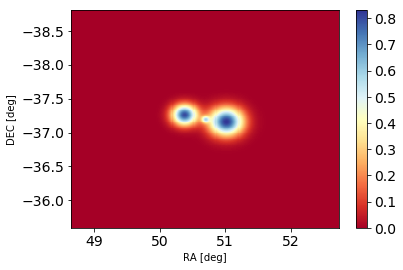

In [7]:
plt.imshow(image_150, extent=[np.min(F_ra), np.max(F_ra),np.max(F_de), np.min(F_de)], cmap=plt.cm.RdYlBu, aspect='auto')
plt.colorbar()
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.show()

## Comibine Msfiles

In [8]:
field_name=np.array(['0h','05h','1h'])  
path_to_GLEAM='/vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/'

for fi in range(len(field_name)): 
    ms_full=table(path_to_GLEAM+'HERA_beam_full_'+field_name[fi]+'.ms',readonly=False)
    ms_GLEAM=table(path_to_GLEAM+'HERA_beam_field_'+field_name[fi]+'_GLEAM.ms', readonly=False)
    data_GLEAM=ms_GLEAM.getcol("DATA")

    ms_Fornax=table(path_to_GLEAM+'HERA_beam_field_'+field_name[fi]+'_Fornax.ms', readonly=False)
    data_Fornax=ms_Fornax.getcol("DATA")

    ms_diffuse_emission=table(path_to_GLEAM+'HERA_beam_field_'+field_name[fi]+'_diffuse_emission.ms', readonly=False)
    data_diffuse_emission=ms_diffuse_emission.getcol("DATA")

    data_full=np.zeros(data_GLEAM.shape,dtype=np.complex128)
    if field_name[fi]=='0h' or  field_name[fi]=='05h':
        data_full=data_GLEAM+data_Fornax+data_diffuse_emission
    else:
        data_full=data_GLEAM+data_diffuse_emission
    ms_full.putcol("DATA",data_full)
    ms_full.close()
    ms_GLEAM.close()
    ms_Fornax.close()
    ms_diffuse_emission.close()


Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/HERA_beam_full_0h.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/HERA_beam_field_0h_GLEAM.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/HERA_beam_field_0h_Fornax.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/HERA_beam_field_0h_diffuse_emission.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/HERA_beam_full_05h.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEA

In [52]:
field_name=np.array(['0h','05h','1h'])  
path_to_GLEAM='/vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/'

for fi in range(len(field_name)): 
    ms_full=table(path_to_GLEAM+'mutual_beam_full_'+field_name[fi]+'.ms',readonly=False)
    ms_GLEAM=table(path_to_GLEAM+'mutual_beam_field_'+field_name[fi]+'_GLEAM.ms', readonly=False)
    data_GLEAM=ms_GLEAM.getcol("DATA")

    ms_Fornax=table(path_to_GLEAM+'mutual_beam_field_'+field_name[fi]+'_Fornax.ms', readonly=False)
    data_Fornax=ms_Fornax.getcol("DATA")

    ms_diffuse_emission=table(path_to_GLEAM+'mutual_beam_field_'+field_name[fi]+'_diffuse_emission.ms', readonly=False)
    data_diffuse_emission=ms_diffuse_emission.getcol("DATA")

    data_full=np.zeros(data_GLEAM.shape,dtype=np.complex128)
    if field_name[fi]=='0h' or  field_name[fi]=='05h':
        data_full=data_GLEAM+data_Fornax+data_diffuse_emission
    else:
        data_full=data_GLEAM+data_diffuse_emission
    ms_full.putcol("DATA",data_full)
    ms_full.close()
    ms_GLEAM.close()
    ms_Fornax.close()
    ms_diffuse_emission.close()

Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/mutual_beam_full_0h.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/mutual_beam_field_0h_GLEAM.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/mutual_beam_field_0h_Fornax.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/mutual_beam_field_0h_diffuse_emission.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/mutual_beam_full_05h.ms: 24 columns, 28 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_

In [ ]:
field_name=np.array(['0h','05h'])  
path_to_GLEAM='/vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/'

for fi in range(len(field_name)): 
    ms_full=table(path_to_GLEAM+'Full_image_'+field_name[fi]+'.ms',readonly=False)
    ms_GLEAM=table(path_to_GLEAM+'GLEAM_'+field_name[fi]+'_image.ms', readonly=False)
    data_GLEAM=ms_GLEAM.getcol("DATA")

    ms_Fornax=table(path_to_GLEAM+'Fornax_'+field_name[fi]+'_image.ms', readonly=False)
    data_Fornax=ms_Fornax.getcol("DATA")

    ms_diffuse_emission=table(path_to_GLEAM+'diffuse_emission_'+field_name[fi]+'_image.ms', readonly=False)
    data_diffuse_emission=ms_diffuse_emission.getcol("DATA")

    data_full=np.zeros(data_GLEAM.shape,dtype=np.complex128)
    data_full=data_GLEAM+data_Fornax+data_diffuse_emission
    ms_full.putcol("DATA",data_full)
    ms_full.close()
    ms_GLEAM.close()
    ms_Fornax.close()
    ms_diffuse_emission.close()

## phase ms file to pointing

In [20]:
field_off_set=np.array([0,40,105])
field_name=np.array(['0h','05h','1h'])  
path_to_GLEAM='/vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/'
fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
radec0 = fld.getcol('PHASE_DIR')

for fi in range(len(field_name)):  
    
    ra_0=fld.getcol('PHASE_DIR')[0,0,0]

    radec0[0,0,0]=ra_0+np.deg2rad(field_off_set[fi])
    print(np.rad2deg(radec0[0,0,0]))
    fld_GLEAM_im=table(path_to_GLEAM+'GLEAM_'+field_name[fi]+'_image.ms'+'::FIELD',readonly=False)
    fld_Fornax_im=table(path_to_GLEAM+'Fornax_'+field_name[fi]+'_image.ms'+'::FIELD',readonly=False)
    fld_diffuse_emission_im=table(path_to_GLEAM+'diffuse_emission_'+field_name[fi]+'_image.ms'+'::FIELD',readonly=False)
    
    fld_GLEAM_im.putcol('PHASE_DIR',radec0)
    fld_Fornax_im.putcol('PHASE_DIR',radec0)
    fld_diffuse_emission_im.putcol('PHASE_DIR',radec0)
    
    
    fld_Fornax=table(path_to_GLEAM+'HERA_beam_field_'+field_name[fi]+'_Fornax.ms'+'::FIELD',readonly=False)
    fld_GLEAM=table(path_to_GLEAM+'HERA_beam_field_'+field_name[fi]+'_GLEAM.ms'+'::FIELD',readonly=False)
    fld_diffuse_emission=table(path_to_GLEAM+'HERA_beam_field_'+field_name[fi]+'_diffuse_emission.ms'+'::FIELD',readonly=False)
    fld_full_hera=table(path_to_GLEAM+'HERA_beam_full_'+field_name[fi]+'.ms'+'::FIELD',readonly=False)
    
    fld_Fornax_m=table(path_to_GLEAM+'mutual_beam_field_'+field_name[fi]+'_Fornax.ms'+'::FIELD',readonly=False)
    fld_GLEAM_m=table(path_to_GLEAM+'mutual_beam_field_'+field_name[fi]+'_GLEAM.ms'+'::FIELD',readonly=False)
    fld_diffuse_emission_m=table(path_to_GLEAM+'mutual_beam_field_'+field_name[fi]+'_diffuse_emission.ms'+'::FIELD',readonly=False)
    fld_full_hera_m=table(path_to_GLEAM+'mutual_beam_full_'+field_name[fi]+'.ms'+'::FIELD',readonly=False)
    
    

    
    fld_Fornax.putcol('PHASE_DIR',radec0)
    fld_GLEAM.putcol('PHASE_DIR',radec0)
    fld_diffuse_emission.putcol('PHASE_DIR',radec0)
    fld_full_hera.putcol('PHASE_DIR',radec0)
    fld_full_hera_m.putcol('PHASE_DIR',radec0)
    
    fld_Fornax_m.putcol('PHASE_DIR',radec0)
    fld_GLEAM_m.putcol('PHASE_DIR',radec0)
    fld_diffuse_emission_m.putcol('PHASE_DIR',radec0)



    fld_Fornax.close()
    fld_GLEAM.close()
    fld_diffuse_emission.close()
    fld_full_hera.close()
    fld_full_hera_m.close()
    
    fld_Fornax_m.close()
    fld_GLEAM_m.close()
    fld_diffuse_emission_m.close()
    
    
    fld_diffuse_emission_im.close()
    fld_Fornax_im.close()
    fld_diffuse_emission_im.close()

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
50.02813844507456
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/GLEAM_0h_image.ms::FIELD: 9 columns, 1 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/Fornax_0h_image.ms::FIELD: 9 columns, 1 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/diffuse_emission_0h_image.ms::FIELD: 9 columns, 1 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/HERA_beam_field_0h_Fornax.ms::FIELD: 9 columns, 1 rows
Successful read/write open of default-locked table /vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corru

## Check gains and Spectra

In [9]:

RA=np.load("/vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/sky_models/field_1h_Fornax_RA_image.npy")
DE=np.load("/vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/sky_models/field_1h_Fornax_DE_image.npy")

In [10]:
RA_cen=RA[0]-(50+40)

In [11]:
RA_cen

-37.25952949207188

In [12]:
gains=np.load("/vault-ike/ntsikelelo/simulated_ms_files/GLEAM_simulations_29_DD_gain_corruption/Gains/Gains_mutual_coupling_EEC_ECC_CCC05h_Fornax.npy")

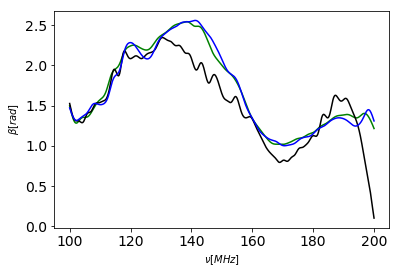

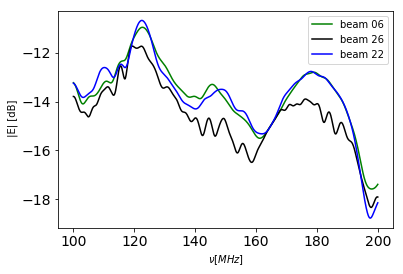

In [18]:
freqs=np.linspace(100,200,1024)
plt.plot(freqs,np.angle(gains[0,0,:,0,0]),'g',label="beam 06")
plt.plot(freqs,np.angle(gains[0,1,:,0,0]),'k',label="beam 26")
plt.plot(freqs,np.angle(gains[0,7,:,0,0]),'b',label="beam 22")
plt.ylabel("$\\beta [rad]$")
plt.xlabel("$\\nu [MHz]$")

plt.figure()
plt.plot(freqs,10*np.log10(np.abs(gains[0,0,:,0,0])),'g',label="beam 06")
plt.plot(freqs,10*np.log10(np.abs(gains[0,1,:,0,0])),'k',label="beam 26")
plt.plot(freqs,10*np.log10(np.abs(gains[0,7,:,0,0])),'b',label="beam 22")
plt.ylabel(" |E| [dB]")
plt.xlabel("$\\nu [MHz]$")
plt.legend()

In [ ]:
fld_Fornax_im=table(path_to_GLEAM+'Fornax_0h_image.ms'+'::FIELD',readonly=True)
np.rad2deg(fld.getcol('PHASE_DIR'))

In [20]:
path_to_rand='/vault-ike/ntsikelelo/simulated_ms_files/Artificial_sky_models/20_random_distributed_sources/'
gains_all=np.load(path_to_rand+'Gains_mutual_coupling_EEC_ECC_CCC.npy')
gains_all_hera=np.load(path_to_rand+'Gains_HERA_Fagnoni_beam.npy')

In [21]:
gains_all.shape

(1, 8, 1024, 200, 1)

In [22]:
gains=np.mean(gains_all[:,:,:,0:100,:],axis=3)
gains_hera=np.mean(gains_all_hera[:,:,:,0:100,:],axis=3)

Text(0.5,0,'$\\nu [MHz]$')

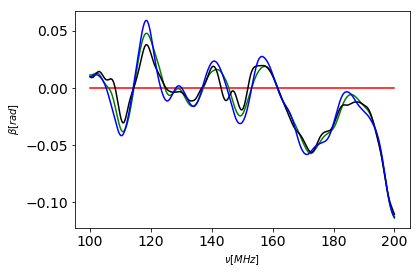

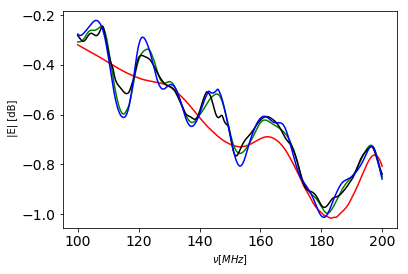

In [23]:
freqs=np.linspace(100,200,1024)
plt.plot(freqs,np.angle(gains_hera[0,0,:,0]),'r',label="no mutual coupling")
plt.plot(freqs,np.angle(gains[0,0,:,0]),'g',label="beam 06")
plt.plot(freqs,np.angle(gains[0,1,:,0]),'k',label="beam 26")
plt.plot(freqs,np.angle(gains[0,7,:,0]),'b',label="beam 22")
plt.ylabel("$\\beta [rad]$")
plt.xlabel("$\\nu [MHz]$")

plt.figure()
plt.plot(freqs,10*np.log10(np.abs(gains_hera[0,0,:,0])),'r',label="no mutual coupling")
plt.plot(freqs,10*np.log10(np.abs(gains[0,0,:,0])),'g',label="beam 06")
plt.plot(freqs,10*np.log10(np.abs(gains[0,1,:,0])),'k',label="beam 26")
plt.plot(freqs,10*np.log10(np.abs(gains[0,7,:,0])),'b',label="beam 22")
plt.ylabel(" |E| [dB]")
plt.xlabel("$\\nu [MHz]$")
# plt.legend()

In [25]:
path_to_rand='/vault-ike/ntsikelelo/simulated_ms_files/Artificial_sky_models/20_random_distributed_sources/'
gains_all=np.load(path_to_rand+'Gains_mutual_coupling_EEC_ECC_CCC_outer.npy')
gains_all_hera=np.load(path_to_rand+'Gains_HERA_Fagnoni_beam_outer.npy')
gains=np.mean(gains_all[:,:,:,100:200,:],axis=3)
gains_hera=np.mean(gains_all_hera[:,:,:,100:200,:],axis=3)

Text(0.5,0,'$\\nu [MHz]$')

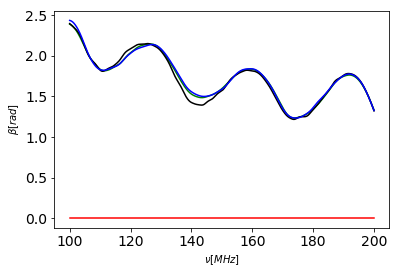

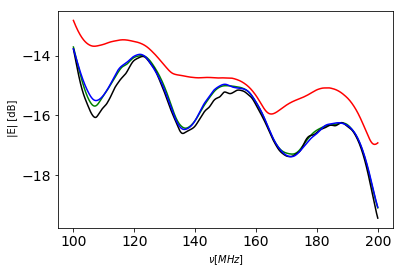

In [26]:
freqs=np.linspace(100,200,1024)
plt.plot(freqs,np.angle(gains_hera[0,0,:,0]),'r',label="no mutual coupling")
plt.plot(freqs,np.angle(gains[0,0,:,0]),'g',label="beam 06")
plt.plot(freqs,np.angle(gains[0,1,:,0]),'k',label="beam 26")
plt.plot(freqs,np.angle(gains[0,7,:,0]),'b',label="beam 22")
plt.ylabel("$\\beta [rad]$")
plt.xlabel("$\\nu [MHz]$")

plt.figure()
plt.plot(freqs,10*np.log10(np.abs(gains_hera[0,0,:,0])),'r',label="no mutual coupling")
plt.plot(freqs,10*np.log10(np.abs(gains[0,0,:,0])),'g',label="beam 06")
plt.plot(freqs,10*np.log10(np.abs(gains[0,1,:,0])),'k',label="beam 26")
plt.plot(freqs,10*np.log10(np.abs(gains[0,7,:,0])),'b',label="beam 22")
plt.ylabel(" |E| [dB]")
plt.xlabel("$\\nu [MHz]$")
# plt.legend()

## Images of models

## Diffuse emission

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
(array([75]),)
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
50.02813844507456
(51.04094, 0.11729749)


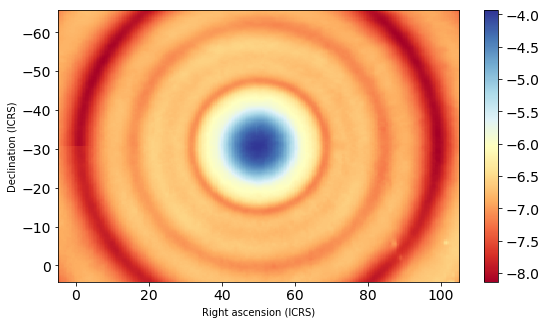

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
90.02813844507456
(51.04094, 0.11729749)


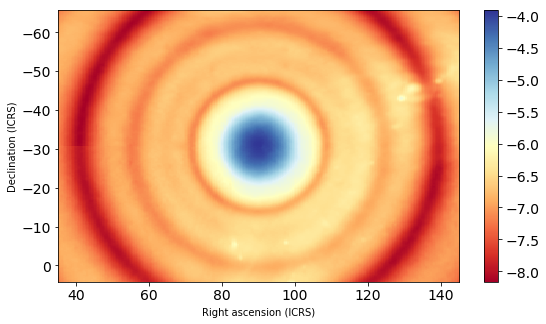

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
155.02813844507455
(51.04094, 0.11729749)


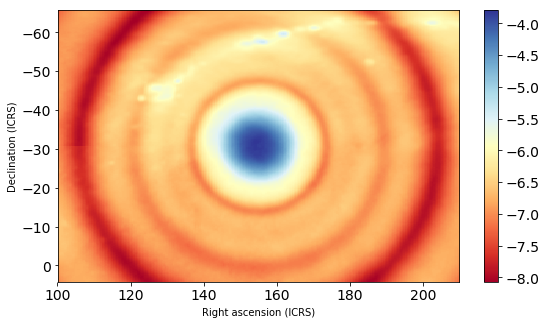

In [4]:

    
def beam_interp_func(theta, phi, data):
        # convert to radians
        theta = copy.copy(theta) * np.pi / 180.0
        phi = copy.copy(phi) * np.pi / 180.0
        shape = theta.shape
        beam_interp = [healpy.get_interp_val(m, theta.ravel(), phi.ravel(), lonlat=False).reshape(shape) for m in data]
        return np.array(beam_interp)
# pointing direction
ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
radec0 = np.tile(radec0, (60,1)) 
fld.close() 
point_ra=np.rad2deg(radec0[0,0])
point_dec=np.rad2deg(radec0[0,1]) 

uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/NF_HERA_power_beam_healpix128.fits')
pol_ind = np.where(uvb.polarization_array ==-6)[0][0]
beam_maps = np.abs(uvb.data_array[0, 0, pol_ind, :, :])
beam_freqs = uvb.freq_array.squeeze() / 1e6
index_175=np.where(beam_freqs==175)
print(index_175)
Nbeam_freqs = len(beam_freqs)
beam_nside = healpy.npix2nside(beam_maps.shape[1])
l,m=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))
theta = np.sqrt( (l)**2 + (m)**2 ) # center origin at the array dec and RA
phi = np.arctan2((m), (l)) + np.pi

pb = beam_interp_func(theta, phi,beam_maps)
    
    
    
field_off_set=np.array([0,40,105])
field_name=np.array(['0h','05h','1h'])
for fi in range(len(field_name)):   
    
    # pointing direction
    ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
    fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
    radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
    radec0 = np.tile(radec0, (60,1)) 
    fld.close() 
    point_ra=np.rad2deg(radec0[0,0])+field_off_set[fi]
    point_dec=np.rad2deg(radec0[0,1]) 

    print(point_ra)

    from astropy.io import fits
    hdulist = fits.open('/home/ntsikelelo/my_files/GLEAM_models/GLEAM_beam_corrected_models/haslam408_dsds_Remazeilles2014.fits')

    # Set up the HEALPix projection
    from astropy_healpix import HEALPix
    from astropy.coordinates import Galactic
    nside = hdulist[1].header['NSIDE']
    order = hdulist[1].header['ORDERING']
    Npix=healpy.nside2npix(nside)
    hp = HEALPix(nside=nside, order=order, frame=Galactic())

    # Sample a 300x200 grid in RA/Dec
    from astropy import units as u
    ra = np.linspace(point_ra-50, point_ra+50, 256) 
    dec = np.linspace(point_dec-35, point_dec+35, 256) 
    ra_grid, dec_grid = np.meshgrid(ra, dec)
#     np.save("/vault-ike/ntsikelelo/diffuse_emission_"+field_name[fi]+"_image_RA.npy",ra_grid.ravel())
#     np.save("/vault-ike/ntsikelelo/diffuse_emission_"+field_name[fi]+"_image_DE.npy",dec_grid.ravel())

    ra = np.linspace(point_ra-50, point_ra+50, 256) * u.deg
    dec = np.linspace(point_dec-35, point_dec+35, 256) * u.deg
    ra_grid, dec_grid = np.meshgrid(ra, dec)

        


    # Set up Astropy coordinate objects
    from astropy.coordinates import SkyCoord
    coords = SkyCoord(ra_grid.ravel(), dec_grid.ravel(), frame='icrs')

    # Interpolate values
    temperature = hdulist[1].data['temperature']
    temperature=temperature.ravel()
    f_408_GHz=0.4 #GHz
    maj0=56.0*60 #seconds
    min0=56.0*60
    maj0_rad=np.deg2rad(56*(0.5/30))
    min0_rad=np.deg2rad(56*(0.5/30))
    constant=(1.222*10**3)/(f_408_GHz**2*maj0*min0)
    Omega=healpy.nside2resol(nside)**2
    B=temperature*(1/constant)
    f_150=175.0 #MHz
    f_408=408.0 #MHz
    Flux_408_MHz=B*Omega
    Flux_150_MHz=Flux_408_MHz*(f_150/f_408)**(-0.7)
    
    print(np.max(Flux_150_MHz),np.min(Flux_150_MHz))

    Flux_map = hp.interpolate_bilinear_skycoord(coords, Flux_150_MHz)
    Flux_map = Flux_map.reshape((256, 256))
    Flux_map=Flux_map*constant*pb[75,:,:]





    



    # Make a plot of the interpolated temperatures
    plt.figure(figsize=(9, 5))
    im = plt.imshow(np.log10(Flux_map), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
#     plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
    plt.colorbar()
    plt.xlabel('Right ascension (ICRS)')
    plt.ylabel('Declination (ICRS)')
    plt.show()
#     np.save("/vault-ike/ntsikelelo/Flux_diffuse_emission_"+field_name[fi]+"_image.npy",Flux_map.ravel())

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
100.0
(array([75]),)
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
50.02813844507456
(51.04094, 0.11729749)


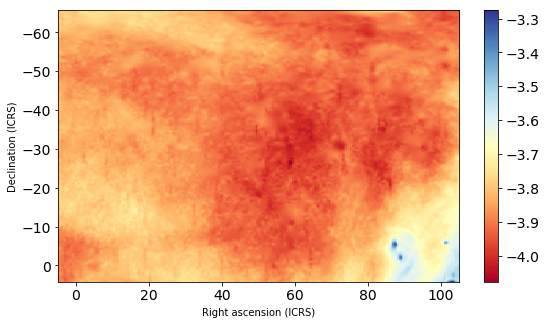

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
90.02813844507456
(51.04094, 0.11729749)


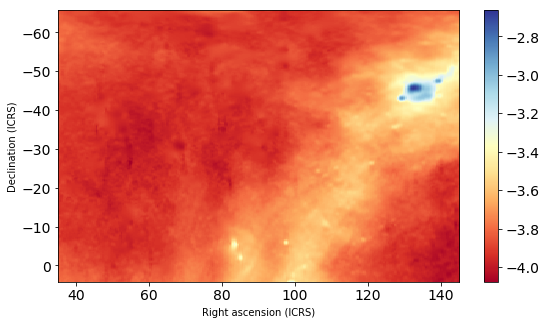

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
155.02813844507455
(51.04094, 0.11729749)


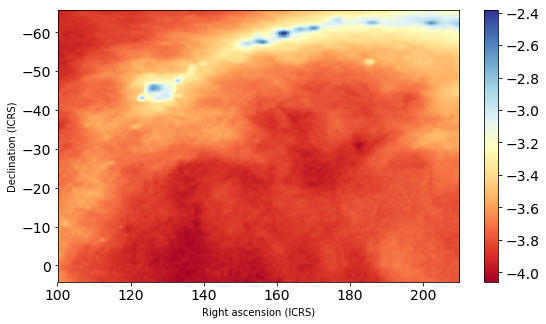

In [5]:
    
def beam_interp_func(theta, phi, data):
        # convert to radians
        theta = copy.copy(theta) * np.pi / 180.0
        phi = copy.copy(phi) * np.pi / 180.0
        shape = theta.shape
        beam_interp = [healpy.get_interp_val(m, theta.ravel(), phi.ravel(), lonlat=False).reshape(shape) for m in data]
        return np.array(beam_interp)
# pointing direction
ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
radec0 = np.tile(radec0, (60,1)) 
fld.close() 
point_ra=np.rad2deg(radec0[0,0])
point_dec=np.rad2deg(radec0[0,1]) 

uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/NF_HERA_power_beam_healpix128.fits')
pol_ind = np.where(uvb.polarization_array ==-6)[0][0]
beam_maps = np.abs(uvb.data_array[0, 0, pol_ind, :, :])
beam_freqs = uvb.freq_array.squeeze() / 1e6
index_175=np.where(beam_freqs==175)
print(beam_freqs[0])
print(index_175)
Nbeam_freqs = len(beam_freqs)
beam_nside = healpy.npix2nside(beam_maps.shape[1])
l,m=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))
theta = np.sqrt( (l)**2 + (m)**2 ) # center origin at the array dec and RA
phi = np.arctan2((m), (l)) + np.pi

pb = beam_interp_func(theta, phi,beam_maps)
    
    
    
field_off_set=np.array([0,40,105])
field_name=np.array(['0h','05h','1h'])
for fi in range(len(field_name)):   
    
        # pointing direction
        ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
        fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
        radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
        radec0 = np.tile(radec0, (60,1)) 
        fld.close() 
        point_ra=np.rad2deg(radec0[0,0])+field_off_set[fi]
        point_dec=np.rad2deg(radec0[0,1]) 

        print(point_ra)

        from astropy.io import fits
        hdulist = fits.open('/home/ntsikelelo/my_files/GLEAM_models/GLEAM_beam_corrected_models/haslam408_dsds_Remazeilles2014.fits')

        # Set up the HEALPix projection
        from astropy_healpix import HEALPix
        from astropy.coordinates import Galactic
        nside = hdulist[1].header['NSIDE']
        order = hdulist[1].header['ORDERING']
        Npix=healpy.nside2npix(nside)
        hp = HEALPix(nside=nside, order=order, frame=Galactic())

        # Sample a 300x200 grid in RA/Dec
        from astropy import units as u
        ra = np.linspace(point_ra-50, point_ra+50, 256) 
        dec = np.linspace(point_dec-35, point_dec+35, 256) 
        ra_grid, dec_grid = np.meshgrid(ra, dec)
    #     np.save("/vault-ike/ntsikelelo/diffuse_emission_"+field_name[fi]+"_image_RA.npy",ra_grid.ravel())
    #     np.save("/vault-ike/ntsikelelo/diffuse_emission_"+field_name[fi]+"_image_DE.npy",dec_grid.ravel())

        ra = np.linspace(point_ra-50, point_ra+50, 256) * u.deg
        dec = np.linspace(point_dec-35, point_dec+35, 256) * u.deg
        ra_grid, dec_grid = np.meshgrid(ra, dec)




        # Set up Astropy coordinate objects
        from astropy.coordinates import SkyCoord
        coords = SkyCoord(ra_grid.ravel(), dec_grid.ravel(), frame='icrs')

        # Interpolate values
        temperature = hdulist[1].data['temperature']
        temperature=temperature.ravel()
        f_408_GHz=0.4 #GHz
        maj0=56.0*60 #seconds
        min0=56.0*60
        maj0_rad=np.deg2rad(56*(0.5/30))
        min0_rad=np.deg2rad(56*(0.5/30))
        constant=(1.222*10**3)/(f_408_GHz**2*maj0*min0)
        Omega=healpy.nside2resol(nside)**2
        B=temperature*(1/constant)
        f_150=175.0 #MHz
        f_408=408.0 #MHz
        Flux_408_MHz=B*Omega
        Flux_150_MHz=Flux_408_MHz*(f_150/f_408)**(-0.7)

        print(np.max(Flux_150_MHz),np.min(Flux_150_MHz))

        Flux_map = hp.interpolate_bilinear_skycoord(coords, Flux_150_MHz)
        Flux_map = Flux_map.reshape((256, 256))
        Flux_map=Flux_map*constant









        # Make a plot of the interpolated temperatures
        plt.figure(figsize=(9, 5))
        im = plt.imshow(np.log10(Flux_map), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
#         plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
        plt.colorbar()
        plt.xlabel('Right ascension (ICRS)')
        plt.ylabel('Declination (ICRS)')
        plt.show()
    #     np.save("/vault-ike/ntsikelelo/Flux_diffuse_emission_"+field_name[fi]+"_image.npy",Flux_map.ravel())

In [9]:
def lookupNearest_model(l_s,m_s,l,m):
  
  index = np.where((np.abs(l-l_s)==np.min(np.abs(l-l_s))) & 
                   (np.abs(m-m_s)==np.min(np.abs(m-m_s))))

  return index

image_grid_diffuse=np.zeros(shape=(3,256,256))
field_off_set=np.array([0,40,105])
for fi in range(len(field_off_set)):
    # pointing direction
    ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
    fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
    radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
    radec0 = np.tile(radec0, (60,1)) 
    fld.close() 
    point_ra=np.rad2deg(radec0[0,0])+field_off_set[fi]
    point_dec=np.rad2deg(radec0[0,1]) 


     ## Diffuse
    Flux_at_diff_150=np.load('/vault-ike/ntsikelelo/diffuse_emmission_flux_haslam.npy')
    RA_diff_all=np.load('/vault-ike/ntsikelelo/diffuse_emmission_RA_haslam.npy')
    DE_diff_all=np.load('/vault-ike/ntsikelelo/diffuse_emmission_DEC_haslam.npy')
    index_diff=np.where((RA_diff_all<point_ra+50) &(RA_diff_all>point_ra-50) & (DE_diff_all<point_dec+35) & (DE_diff_all>point_dec-35)) 
    diff_150_sel=Flux_at_diff_150[index_diff]
    RA_diff=RA_diff_all[index_diff]
    DE_diff=DE_diff_all[index_diff]
    
    flux=(175/150)**(-0.7)*(diff_150_sel)
    RA_cen=RA_diff-point_ra
    DE_cen= DE_diff-point_dec
    l,m=np.meshgrid(np.linspace(50,-50,256),np.linspace(-35,35,256))

    for k in range(len(flux)):
        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_diffuse[fi,index[0],index[1]]=image_grid_diffuse[fi,index[0],index[1]]+flux[k]

    

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows


divide by zero encountered in log10


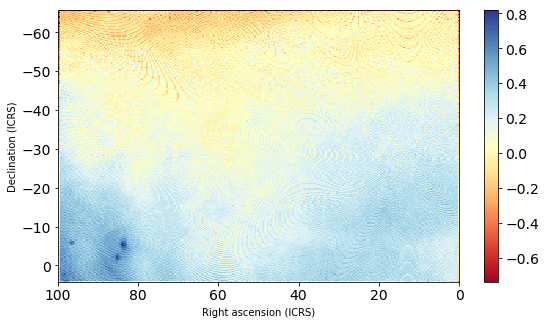

divide by zero encountered in log10


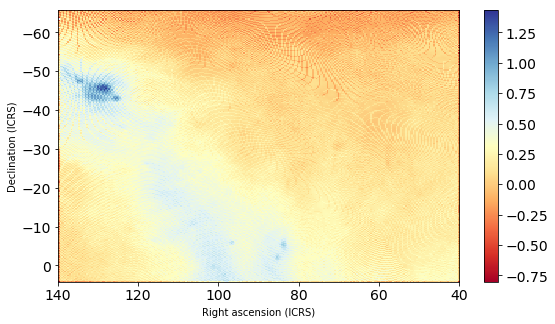

divide by zero encountered in log10


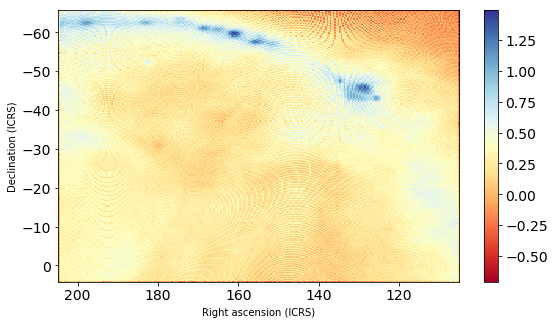

In [12]:
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse[0,:,:]), extent=[50+50, 50-50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse[1,:,:]), extent=[90+50, 90-50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse[2,:,:]), extent=[155+50, 155-50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

divide by zero encountered in log10


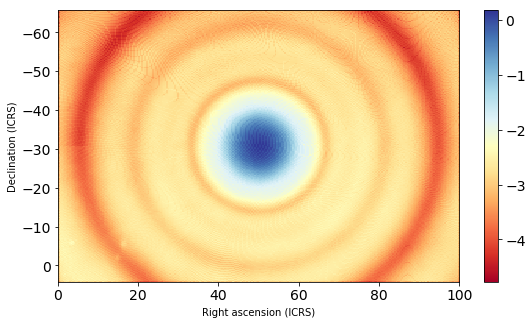

divide by zero encountered in log10


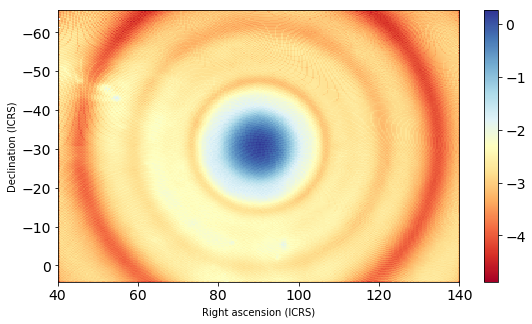

divide by zero encountered in log10


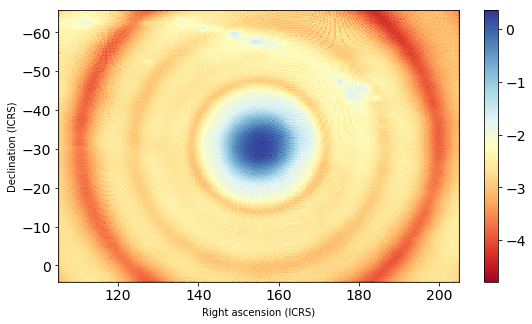

In [13]:
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse[0,:,:]*pb[75,:,:]), extent=[50-50, 50+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse[1,:,:]*pb[75,:,:]), extent=[90-50, 90+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse[2,:,:]*pb[75,:,:]), extent=[155-50, 155+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

## GLEAM and Fornax 

In [28]:
def lookupNearest_model(l_s,m_s,l,m):
  
  index = np.where((np.abs(l-l_s)==np.min(np.abs(l-l_s))) & 
                   (np.abs(m-m_s)==np.min(np.abs(m-m_s))))

  return index


image_grid_GLEAM=np.zeros(shape=(3,256,256))
image_grid_Fornax=np.zeros(shape=(3,256,256))
field_off_set=np.array([0,40,105])
for fi in range(len(field_off_set)):
    # pointing direction
    ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
    fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
    radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
    radec0 = np.tile(radec0, (60,1)) 
    fld.close() 
    point_ra=np.rad2deg(radec0[0,0])+field_off_set[fi]
    point_dec=np.rad2deg(radec0[0,1]) 

    ##Fornax
    RA_fornax=np.load('/vault-ike/ntsikelelo/Fornax_RA.npy')
    DE_fornax=np.load('/vault-ike/ntsikelelo/Fornax_DEC.npy')
    flux=np.load('/vault-ike/ntsikelelo/Fornax_Flux.npy')[768,:]
    RA_cen=RA_fornax-point_ra
    DE_cen=DE_fornax-point_dec
    l,m=np.meshgrid(np.linspace(50,-50,256),np.linspace(-35,35,256))

    for k in range(len(flux)):
        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_Fornax[fi,index[0],index[1]]=image_grid_Fornax[fi,index[0],index[1]]+flux[k]

    ## GLEAM sources
    gleam_catalogue = Table.read('/home/ntsikelelo/my_files/GLEAM_models/GLEAM_models_var/GLEAM_EGC_v2.fits') 
    original_flux=gleam_catalogue['int_flux_151']
    original_flux[np.where(np.isnan(original_flux)==True)]=0

    indices1=np.where((gleam_catalogue['RAJ2000']<point_ra+50) &(gleam_catalogue['RAJ2000']>point_ra-50)& (gleam_catalogue['DEJ2000']<point_dec+35) & (gleam_catalogue['DEJ2000']>point_dec-35) & (original_flux>0.2))

    DE1=gleam_catalogue['DEJ2000'][indices1]
    RA1=gleam_catalogue['RAJ2000'][indices1]
    flux1_150=gleam_catalogue['int_flux_151'][indices1]
    spectral_index1=gleam_catalogue['alpha'][indices1]
    spectral_index1[np.where(np.isnan(spectral_index1)==True)]=-0.7


    flux=np.zeros(shape=(flux1_150.shape[0]))
    for k in range(flux.shape[0]):
        flux[k]=(175/150)**(spectral_index1[k])*(flux1_150[k])

    RA_cen=RA1-point_ra
    DE_cen=DE1-point_dec
    l,m=np.meshgrid(np.linspace(50,-50,256),np.linspace(-35,35,256))
    for k in range(len(flux)):
        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_GLEAM[fi,index[0],index[1]]=image_grid_GLEAM[fi,index[0],index[1]]+flux[k]

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows


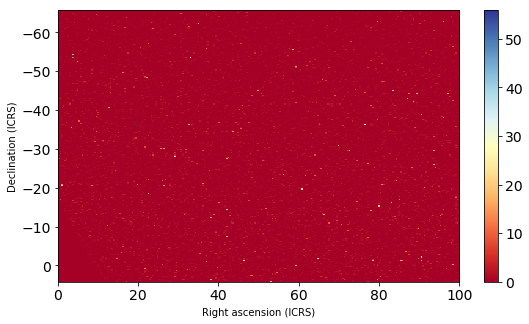

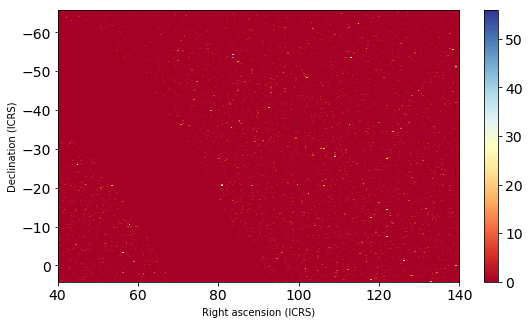

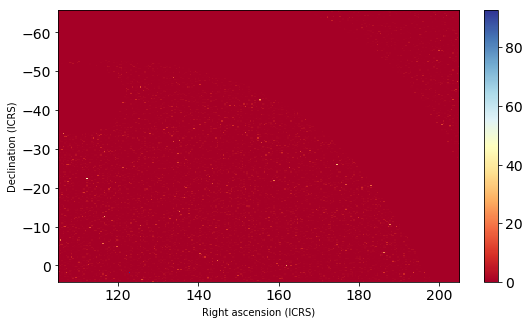

In [29]:
plt.figure(figsize=(9, 5))
im = plt.imshow(image_grid_GLEAM[0,:,:], extent=[50-50, 50+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(image_grid_GLEAM[1,:,:], extent=[90-50, 90+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(image_grid_GLEAM[2,:,:], extent=[155-50, 155+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

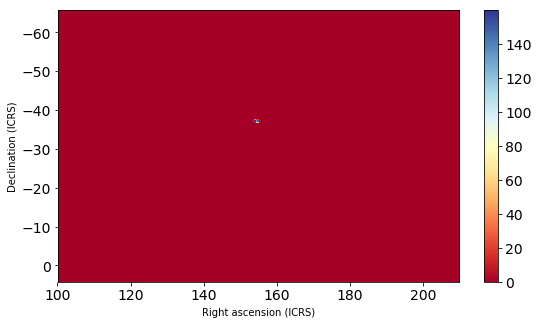

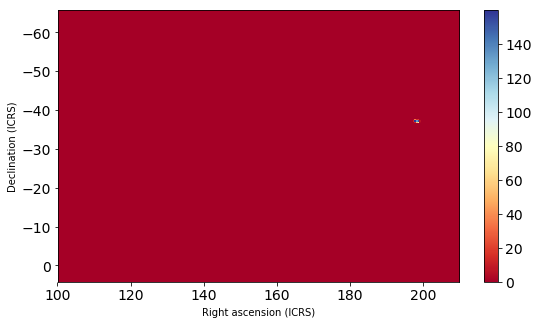

In [30]:
plt.figure(figsize=(9, 5))
im = plt.imshow(image_grid_Fornax[0,:,:], extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(image_grid_Fornax[1,:,:], extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()


divide by zero encountered in log10


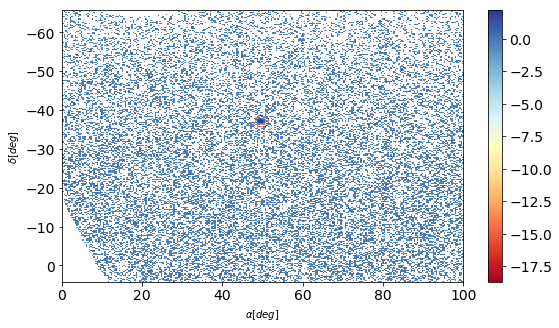

divide by zero encountered in log10


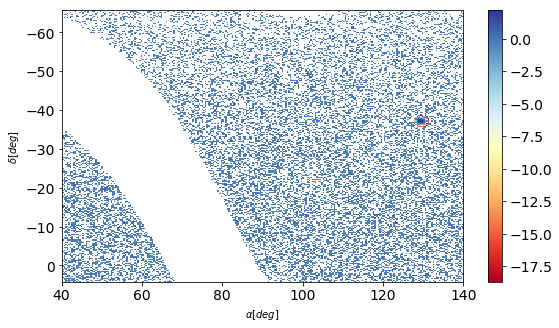

divide by zero encountered in log10


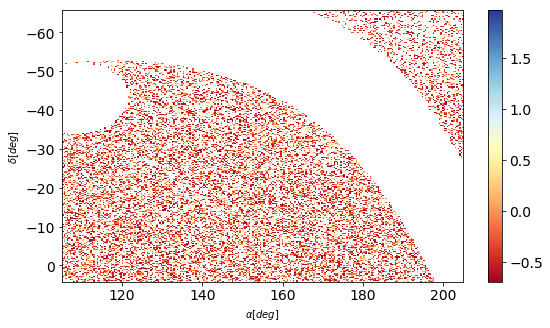

In [31]:
image_grid_GLEAM_and_Fornax=image_grid_GLEAM+image_grid_Fornax
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_and_Fornax[0,:,:]), extent=[50-50, 50+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('$\\alpha [deg]$')
plt.ylabel('$\\delta [deg]$')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_and_Fornax[1,:,:]), extent=[90-50, 90+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('$\\alpha [deg]$')
plt.ylabel('$\\delta [deg]$')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM[2,:,:]), extent=[155-50, 155+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('$\\alpha [deg]$')
plt.ylabel('$\\delta [deg]$')
plt.show()

divide by zero encountered in log10


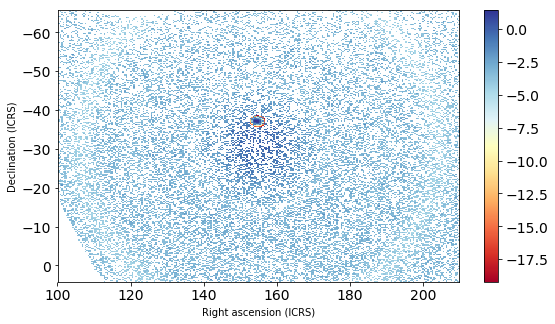

divide by zero encountered in log10


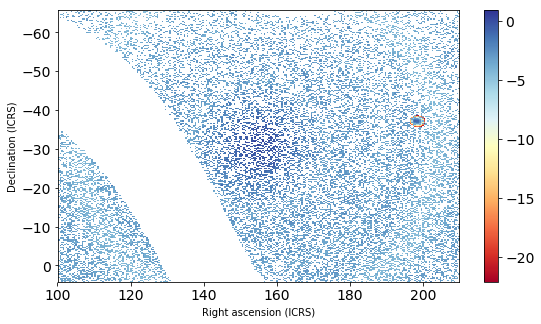

divide by zero encountered in log10


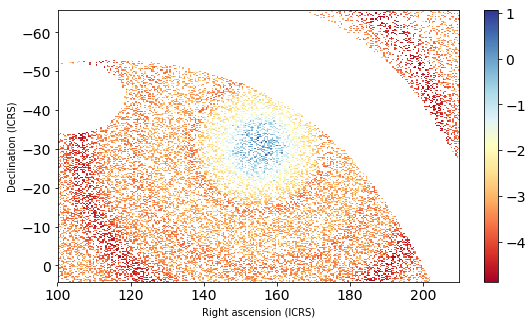

In [32]:
image_grid_GLEAM_and_Fornax=image_grid_GLEAM+image_grid_Fornax
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_and_Fornax[0,:,:]*pb[75,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
image_grid_GLEAM_and_Fornax=image_grid_GLEAM+image_grid_Fornax
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_and_Fornax[1,:,:]*pb[75,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM[2,:,:]*pb[75,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

In [33]:
image_grid_full=image_grid_GLEAM_and_Fornax+image_grid_diffuse

divide by zero encountered in log10


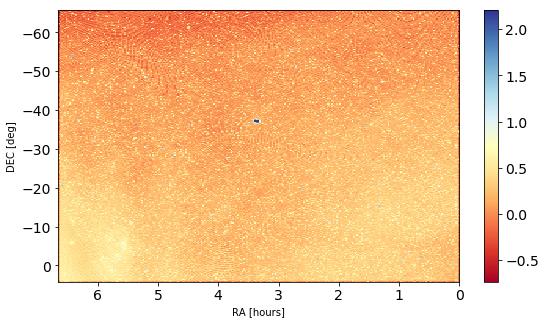

divide by zero encountered in log10


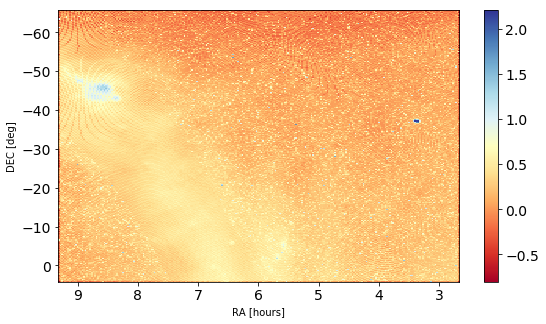

divide by zero encountered in log10


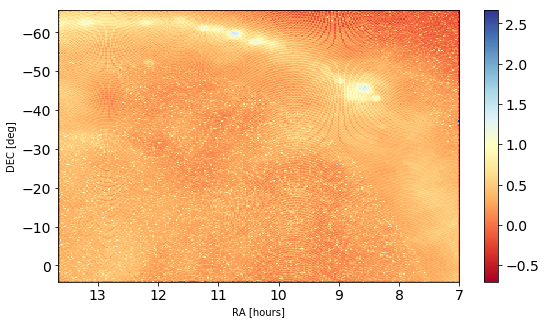

In [34]:
image_grid_GLEAM_and_Fornax=image_grid_GLEAM+image_grid_Fornax
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_full[0,:,:]), extent=[(50+50)*(24.0/360), (50-50)**(24.0/360), point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_full[1,:,:]), extent=[(90+50)*(24.0/360),(90-50)*(24.0/360), point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_full[2,:,:]), extent=[(155+50)*(24.0/360),(155-50)*(24.0/360), point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()

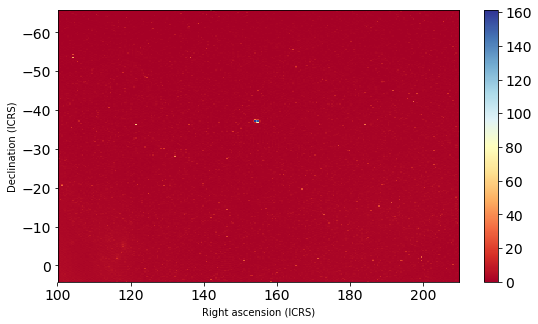

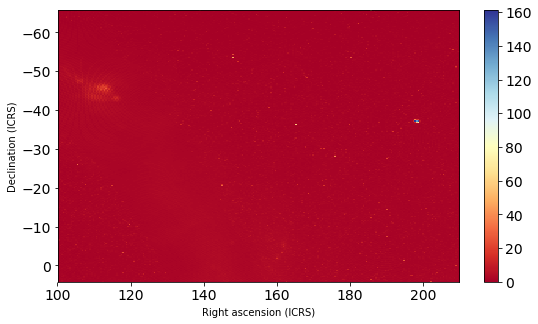

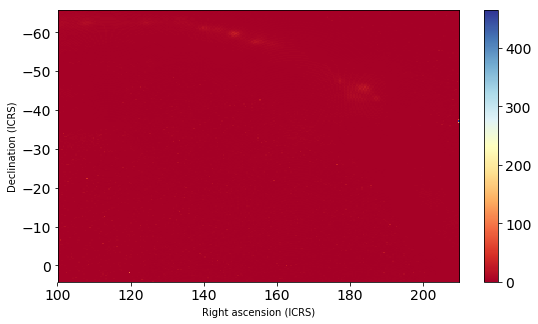

In [35]:
image_grid_GLEAM_and_Fornax=image_grid_GLEAM+image_grid_Fornax
plt.figure(figsize=(9, 5))
im = plt.imshow(image_grid_full[0,:,:], extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(image_grid_full[1,:,:], extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(image_grid_full[2,:,:], extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

divide by zero encountered in log10


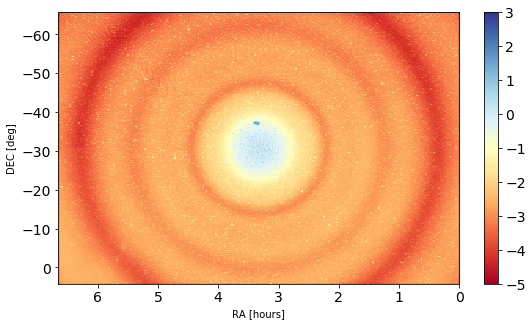

divide by zero encountered in log10


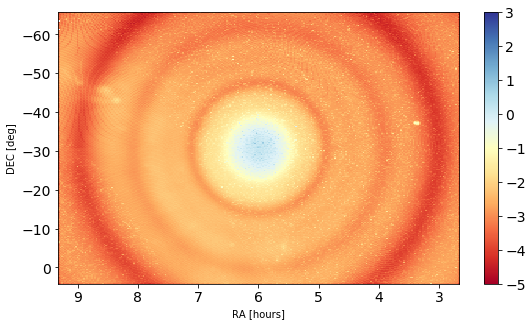

divide by zero encountered in log10


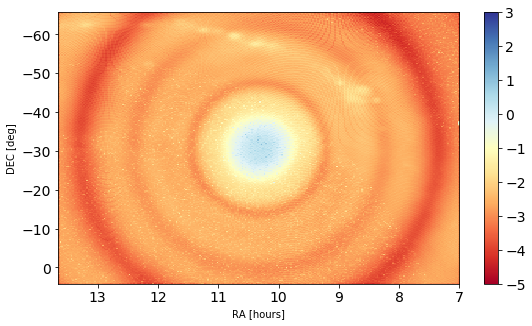

In [37]:
image_grid_GLEAM_and_Fornax=image_grid_GLEAM+image_grid_Fornax
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_full[0,:,:]*pb[75,:,:]), extent=[(50+50)*(24.0/360),(50-50)*(24.0/360), point_dec+35, point_dec-35], vmin=-5, vmax=3, cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_full[1,:,:]*pb[75,:,:]), extent=[(90+50)*(24.0/360), (90-50)*(24.0/360), point_dec+35, point_dec-35], vmin=-5, vmax=3,cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_full[2,:,:]*pb[75,:,:]), extent=[(155+50)*(24.0/360), (155-50)*(24.0/360), point_dec+35, point_dec-35], vmin=-5, vmax=3,cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()

## mutual couple images 

In [5]:

uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/HERA-Beams/NF_CrossCouplingBeams/NF_HERA-Dipole_ccbeam_port06_E-field_phasecorrected.fits')
uvb.peak_normalize()
print("beam normalised")

beam_maps = uvb.data_array[0, 0, 0, :, :, :]
beam_freqs = uvb.freq_array.squeeze() / 1e6
print(np.where(beam_freqs==175))
Nbeam_freqs = len(beam_freqs)
phi_grid,theta_grid=np.meshgrid(uvb.axis1_array,uvb.axis2_array) ## theta,phi


    
def lookupNearest_model(l_s,m_s,l,m):

    index = np.where((np.abs(l-l_s)==np.min(np.abs(l-l_s))) & 
               (np.abs(m-m_s)==np.min(np.abs(m-m_s))))

    return index
def lookupNearest(theta_s,phi_s,theta,phi):
  
  index = np.where((np.abs(theta-theta_s)==np.min(np.abs(theta-theta_s))) & 
                   (np.abs(phi-phi_s)==np.min(np.abs(phi-phi_s))))

  return index

image_grid_GLEAM_mutual=np.zeros(shape=(3,256,256))
image_grid_Fornax_mutual=np.zeros(shape=(3,256,256))
field_off_set=np.array([0,40,105])
for fi in range(len(field_off_set)):
    # pointing direction
    ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
    fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
    radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
    radec0 = np.tile(radec0, (60,1)) 
    fld.close() 
    point_ra=np.rad2deg(radec0[0,0])+field_off_set[fi]
    point_dec=np.rad2deg(radec0[0,1]) 

    ##Fornax
    RA_fornax=np.load('/vault-ike/ntsikelelo/Fornax_RA.npy')
    DE_fornax=np.load('/vault-ike/ntsikelelo/Fornax_DEC.npy')
    flux=np.load('/vault-ike/ntsikelelo/Fornax_Flux.npy')[768,:]
    RA_cen=RA_fornax-point_ra
    DE_cen=DE_fornax-point_dec
    l,m=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))
    theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az mu 
    phi = np.arctan2((DE_cen), (RA_cen)) + np.pi
    
           

    for k in range(len(flux)):
        
        index=lookupNearest(np.deg2rad(theta[k]),np.deg2rad(phi[k]),theta_grid,phi_grid)
        index=np.array(index)[:,0]
        gain=np.abs(beam_maps[250,index[0],index[1]])**2
        
        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_Fornax_mutual[fi,index[0],index[1]]=image_grid_Fornax_mutual[fi,index[0],index[1]]+flux[k]*gain

    ## GLEAM sources
    gleam_catalogue = Table.read('/home/ntsikelelo/my_files/GLEAM_models/GLEAM_models_var/GLEAM_EGC_v2.fits') 
    original_flux=gleam_catalogue['int_flux_151']
    original_flux[np.where(np.isnan(original_flux)==True)]=0

    indices1=np.where((gleam_catalogue['RAJ2000']<point_ra+50) &(gleam_catalogue['RAJ2000']>point_ra-50)& (gleam_catalogue['DEJ2000']<point_dec+35) & (gleam_catalogue['DEJ2000']>point_dec-35) & (original_flux>0.2))

    DE1=gleam_catalogue['DEJ2000'][indices1]
    RA1=gleam_catalogue['RAJ2000'][indices1]
    flux1_150=gleam_catalogue['int_flux_151'][indices1]
    spectral_index1=gleam_catalogue['alpha'][indices1]
    spectral_index1[np.where(np.isnan(spectral_index1)==True)]=-0.7


    flux=np.zeros(shape=(flux1_150.shape[0]))
    for k in range(flux.shape[0]):
        flux[k]=(175/150)**(spectral_index1[k])*(flux1_150[k])

    RA_cen=RA1-point_ra
    DE_cen=DE1-point_dec
    theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az mu 
    phi = np.arctan2((DE_cen), (RA_cen)) + np.pi
    for k in range(len(flux)):

        index=lookupNearest(np.deg2rad(theta[k]),np.deg2rad(phi[k]),theta_grid,phi_grid)
        index=np.array(index)[:,0]
        gain=np.abs(beam_maps[250,index[0],index[1]])**2

        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_GLEAM_mutual[fi,index[0],index[1]]=image_grid_GLEAM_mutual[fi,index[0],index[1]]+flux[k]*gain

beam normalised
(array([250]),)
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows


divide by zero encountered in log10


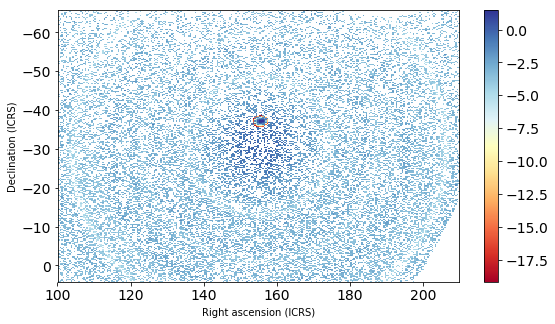

divide by zero encountered in log10


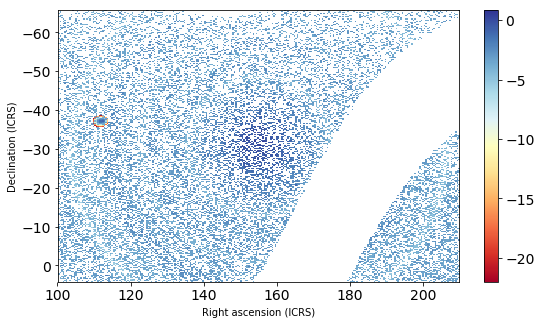

divide by zero encountered in log10


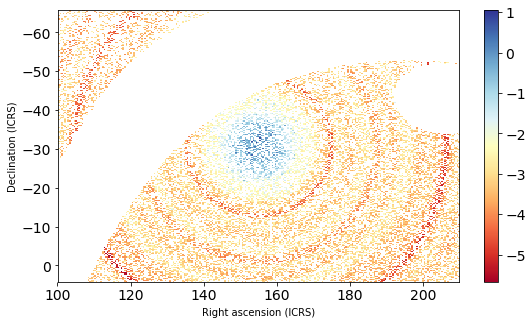

In [6]:
image_grid_GLEAM_and_Fornax_mutual=image_grid_GLEAM_mutual+image_grid_Fornax_mutual
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_and_Fornax_mutual[0,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_and_Fornax_mutual[1,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_mutual[2,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

In [7]:
def lookupNearest_model(l_s,m_s,l,m):
  
  index = np.where((np.abs(l-l_s)==np.min(np.abs(l-l_s))) & 
                   (np.abs(m-m_s)==np.min(np.abs(m-m_s))))

  return index

image_grid_diffuse_mutual=np.zeros(shape=(3,256,256))
field_off_set=np.array([0,40,105])
for fi in range(len(field_off_set)):
    # pointing direction
    ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
    fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
    radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
    radec0 = np.tile(radec0, (60,1)) 
    fld.close() 
    point_ra=np.rad2deg(radec0[0,0])+field_off_set[fi]
    point_dec=np.rad2deg(radec0[0,1]) 


     ## Diffuse
    Flux_at_diff_150=np.load('/vault-ike/ntsikelelo/diffuse_emmission_flux_haslam.npy')
    RA_diff_all=np.load('/vault-ike/ntsikelelo/diffuse_emmission_RA_haslam.npy')
    DE_diff_all=np.load('/vault-ike/ntsikelelo/diffuse_emmission_DEC_haslam.npy')
    index_diff=np.where((RA_diff_all<point_ra+50) &(RA_diff_all>point_ra-50) & (DE_diff_all<point_dec+35) & (DE_diff_all>point_dec-35)) 
    diff_150_sel=Flux_at_diff_150[index_diff]
    RA_diff=RA_diff_all[index_diff]
    DE_diff=DE_diff_all[index_diff]
    
    flux=(175/150)**(-0.7)*(diff_150_sel)
    RA_cen=RA_diff-point_ra
    DE_cen= DE_diff-point_dec
    l,m=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))
    theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az mu 
    phi = np.arctan2((DE_cen), (RA_cen)) + np.pi
    
    for k in range(len(flux)):

        index=lookupNearest(np.deg2rad(theta[k]),np.deg2rad(phi[k]),theta_grid,phi_grid)
        index=np.array(index)[:,0]
        gain=np.abs(beam_maps[250,index[0],index[1]])**2

        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_diffuse_mutual[fi,index[0],index[1]]=image_grid_diffuse_mutual[fi,index[0],index[1]]+flux[k]*gain

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows


divide by zero encountered in log10


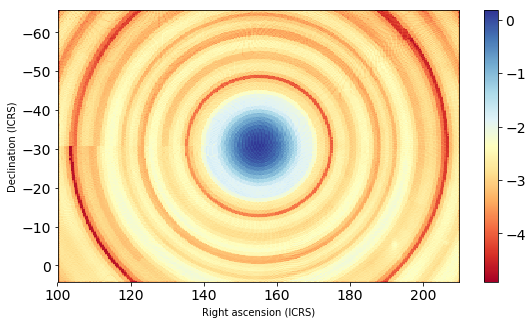

divide by zero encountered in log10


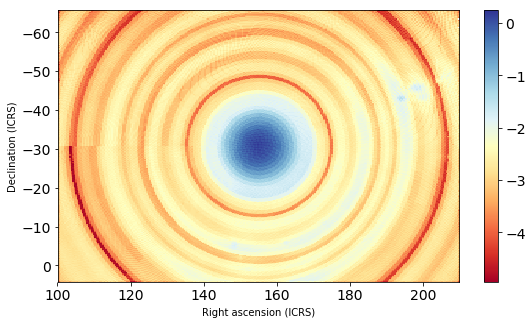

divide by zero encountered in log10


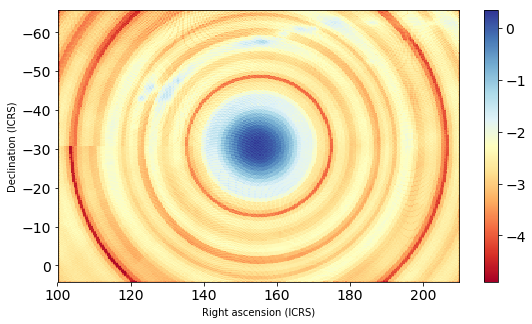

In [8]:
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse_mutual[0,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse_mutual[1,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_diffuse_mutual[2,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

divide by zero encountered in log10


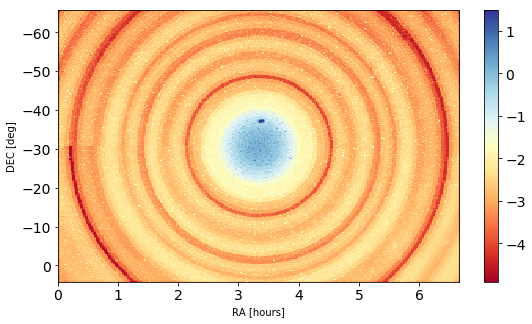

divide by zero encountered in log10


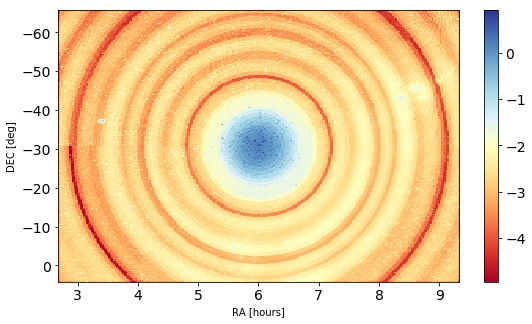

divide by zero encountered in log10


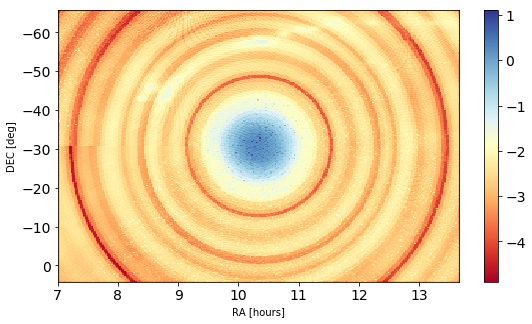

In [10]:
Image_mutual_full=image_grid_diffuse_mutual+image_grid_GLEAM_and_Fornax_mutual
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(Image_mutual_full[0,:,:]), extent=[(50-50)*(24.0/360), (50+50)*(24.0/360), point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(Image_mutual_full[1,:,:]), extent=[(90-50)*(24.0/360), (90+50)*(24.0/360), point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(Image_mutual_full[2,:,:]), extent=[(155-50)*(24.0/360), (155+50)*(24.0/360), point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('RA [hours]')
plt.ylabel('DEC [deg]')
plt.show()

TypeError: Invalid dimensions for image data

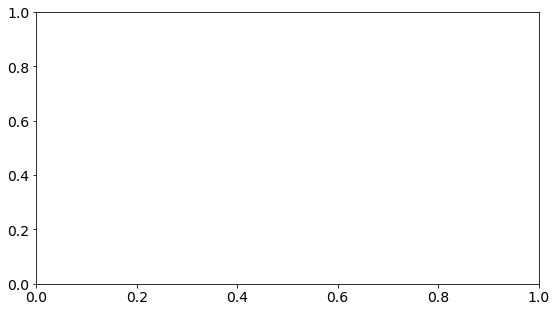

In [57]:
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(flux), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
plt.colorbar(im)
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

## Port 26

In [51]:

uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/HERA-Beams/NF_CrossCouplingBeams/NF_HERA-Dipole_ccbeam_port26_E-field_phasecorrected.fits')
uvb.peak_normalize()
print("beam normalised")

beam_maps = uvb.data_array[0, 0, 0, :, :, :]
beam_freqs = uvb.freq_array.squeeze() / 1e6
print(np.where(beam_freqs==175))
Nbeam_freqs = len(beam_freqs)
phi_grid,theta_grid=np.meshgrid(uvb.axis1_array,uvb.axis2_array) ## theta,phi


    
def lookupNearest_model(l_s,m_s,l,m):

    index = np.where((np.abs(l-l_s)==np.min(np.abs(l-l_s))) & 
               (np.abs(m-m_s)==np.min(np.abs(m-m_s))))

    return index
def lookupNearest(theta_s,phi_s,theta,phi):
  
  index = np.where((np.abs(theta-theta_s)==np.min(np.abs(theta-theta_s))) & 
                   (np.abs(phi-phi_s)==np.min(np.abs(phi-phi_s))))

  return index

image_grid_GLEAM_mutual_26=np.zeros(shape=(3,256,256))
image_grid_Fornax_mutual_26=np.zeros(shape=(3,256,256))
field_off_set=np.array([0,40,105])
for fi in range(len(field_off_set)):
    # pointing direction
    ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
    fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
    radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
    radec0 = np.tile(radec0, (60,1)) 
    fld.close() 
    point_ra=np.rad2deg(radec0[0,0])+field_off_set[fi]
    point_dec=np.rad2deg(radec0[0,1]) 

    ##Fornax
    RA_fornax=np.load('/vault-ike/ntsikelelo/Fornax_RA.npy')
    DE_fornax=np.load('/vault-ike/ntsikelelo/Fornax_DEC.npy')
    flux=np.load('/vault-ike/ntsikelelo/Fornax_Flux.npy')[768,:]
    RA_cen=RA_fornax-point_ra
    DE_cen=DE_fornax-point_dec
    l,m=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))
    theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az mu 
    phi = np.arctan2((DE_cen), (RA_cen)) + np.pi
    
           

    for k in range(len(flux)):
        
        index=lookupNearest(np.deg2rad(theta[k]),np.deg2rad(phi[k]),theta_grid,phi_grid)
        index=np.array(index)[:,0]
        gain=np.abs(beam_maps[250,index[0],index[1]])**2
        
        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_Fornax_mutual_26[fi,index[0],index[1]]=image_grid_Fornax_mutual_26[fi,index[0],index[1]]+flux[k]*gain

    ## GLEAM sources
    gleam_catalogue = Table.read('/home/ntsikelelo/my_files/GLEAM_models/GLEAM_models_var/GLEAM_EGC_v2.fits') 
    original_flux=gleam_catalogue['int_flux_151']
    original_flux[np.where(np.isnan(original_flux)==True)]=0

    indices1=np.where((gleam_catalogue['RAJ2000']<point_ra+50) &(gleam_catalogue['RAJ2000']>point_ra-50)& (gleam_catalogue['DEJ2000']<point_dec+35) & (gleam_catalogue['DEJ2000']>point_dec-35) & (original_flux>0.2))

    DE1=gleam_catalogue['DEJ2000'][indices1]
    RA1=gleam_catalogue['RAJ2000'][indices1]
    flux1_150=gleam_catalogue['int_flux_151'][indices1]
    spectral_index1=gleam_catalogue['alpha'][indices1]
    spectral_index1[np.where(np.isnan(spectral_index1)==True)]=-0.7


    flux=np.zeros(shape=(flux1_150.shape[0]))
    for k in range(flux.shape[0]):
        flux[k]=(175/150)**(spectral_index1[k])*(flux1_150[k])

    RA_cen=RA1-point_ra
    DE_cen=DE1-point_dec
    theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az mu 
    phi = np.arctan2((DE_cen), (RA_cen)) + np.pi
    for k in range(len(flux)):

        index=lookupNearest(np.deg2rad(theta[k]),np.deg2rad(phi[k]),theta_grid,phi_grid)
        index=np.array(index)[:,0]
        gain=np.abs(beam_maps[250,index[0],index[1]])**2

        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_GLEAM_mutual_26[fi,index[0],index[1]]=image_grid_GLEAM_mutual_26[fi,index[0],index[1]]+flux[k]*gain

beam normalised
(array([250]),)
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows


divide by zero encountered in log10


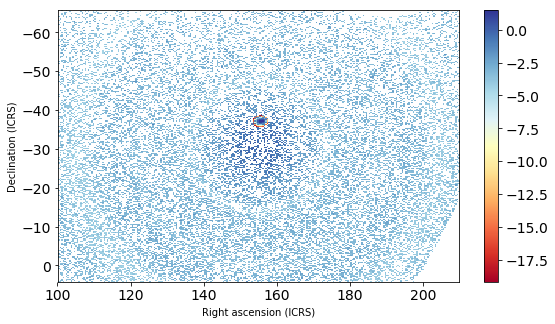

divide by zero encountered in log10


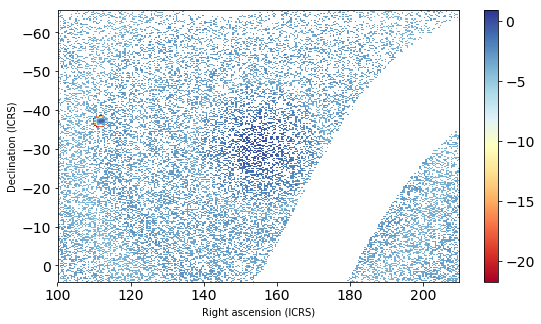

divide by zero encountered in log10


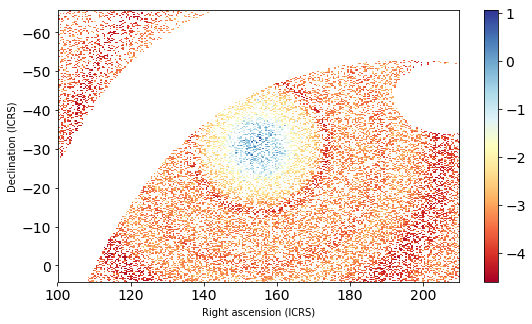

In [52]:
image_grid_GLEAM_and_Fornax_mutual_26=image_grid_GLEAM_mutual_26+image_grid_Fornax_mutual_26
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_and_Fornax_mutual_26[0,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_and_Fornax_mutual_26[1,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_GLEAM_mutual_26[2,:,:]), extent=[point_ra-55, point_ra+55, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

In [53]:

def lookupNearest_model(l_s,m_s,l,m):
  
  index = np.where((np.abs(l-l_s)==np.min(np.abs(l-l_s))) & 
                   (np.abs(m-m_s)==np.min(np.abs(m-m_s))))

  return index

image_grid_diffuse_mutual_26=np.zeros(shape=(3,256,256))
field_off_set=np.array([0,40,105])
for fi in range(len(field_off_set)):
    # pointing direction
    ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
    fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
    radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
    radec0 = np.tile(radec0, (60,1)) 
    fld.close() 
    point_ra=np.rad2deg(radec0[0,0])+field_off_set[fi]
    point_dec=np.rad2deg(radec0[0,1]) 


     ## Diffuse
    Flux_at_diff_150=np.load('/vault-ike/ntsikelelo/diffuse_emmission_flux_haslam.npy')
    RA_diff_all=np.load('/vault-ike/ntsikelelo/diffuse_emmission_RA_haslam.npy')
    DE_diff_all=np.load('/vault-ike/ntsikelelo/diffuse_emmission_DEC_haslam.npy')
    index_diff=np.where((RA_diff_all<point_ra+50) &(RA_diff_all>point_ra-50) & (DE_diff_all<point_dec+35) & (DE_diff_all>point_dec-35)) 
    diff_150_sel=Flux_at_diff_150[index_diff]
    RA_diff=RA_diff_all[index_diff]
    DE_diff=DE_diff_all[index_diff]
    
    flux=(175/150)**(-0.7)*(diff_150_sel)
    RA_cen=RA_diff-point_ra
    DE_cen= DE_diff-point_dec
    l,m=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))
    theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az mu 
    phi = np.arctan2((DE_cen), (RA_cen)) + np.pi
    
    for k in range(len(flux)):

        index=lookupNearest(np.deg2rad(theta[k]),np.deg2rad(phi[k]),theta_grid,phi_grid)
        index=np.array(index)[:,0]
        gain=np.abs(beam_maps[250,index[0],index[1]])**2

        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_diffuse_mutual_26[fi,index[0],index[1]]=image_grid_diffuse_mutual_26[fi,index[0],index[1]]+flux[k]*gain

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows


divide by zero encountered in log10


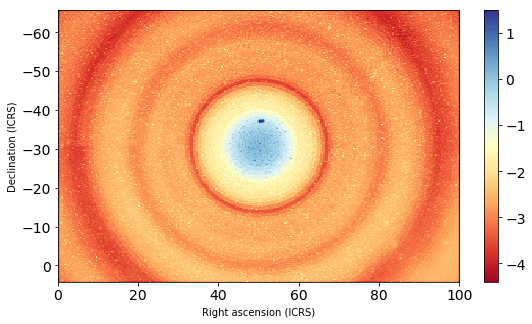

divide by zero encountered in log10


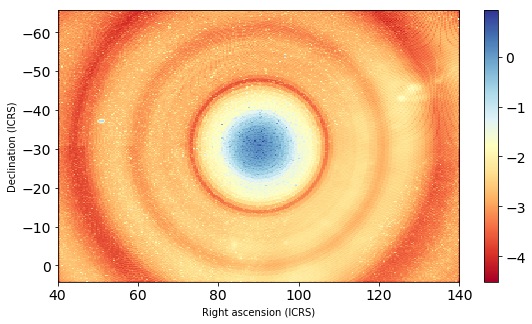

divide by zero encountered in log10


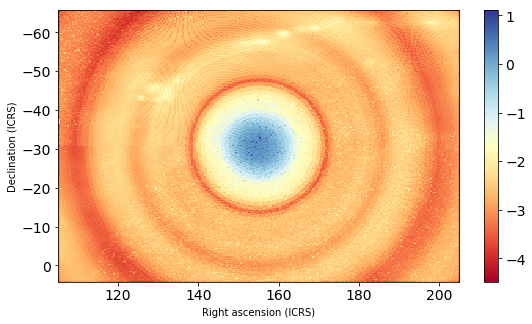

In [54]:
Image_mutual_full_26=image_grid_diffuse_mutual_26+image_grid_GLEAM_and_Fornax_mutual_26
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(Image_mutual_full_26[0,:,:]), extent=[50-50, 50+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(Image_mutual_full_26[1,:,:]), extent=[90-50, 90+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(Image_mutual_full_26[2,:,:]), extent=[155-50, 155+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

## beam

In [79]:
uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/HERA-Beams/NF_CrossCouplingBeams/NF_HERA-Dipole_ccbeam_port26_E-field_phasecorrected.fits')
uvb.peak_normalize()
print("beam normalised")

beam_maps = uvb.data_array[0, 0, 0, :, :, :]
beam_freqs = uvb.freq_array.squeeze() / 1e6
print(np.where(beam_freqs==175))
Nbeam_freqs = len(beam_freqs)
phi_grid,theta_grid=np.meshgrid(uvb.axis1_array,uvb.axis2_array) ## theta,phi
def lookupNearest(theta_s,phi_s,theta,phi):
  
  index = np.where((np.abs(theta-theta_s)==np.min(np.abs(theta-theta_s))) & 
                   (np.abs(phi-phi_s)==np.min(np.abs(phi-phi_s))))

  return index
def lookupNearest_model(l_s,m_s,l,m):
  
  index = np.where((np.abs(l-l_s)==np.min(np.abs(l-l_s))) & 
                   (np.abs(m-m_s)==np.min(np.abs(m-m_s))))

  return index

image_grid_beam_mutual_26=np.zeros(shape=(3,256,256))
field_off_set=np.array([0])

    
RA_cen_g,DE_cen_g=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))
RA_cen=RA_cen_g.ravel()
DE_cen=DE_cen_g.ravel()

flux=np.ones(RA_cen.shape)
l,m=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))
theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az mu 
phi = np.arctan2((DE_cen), (RA_cen)) + np.pi

for k in range(len(flux)):

    index=lookupNearest(np.deg2rad(theta[k]),np.deg2rad(phi[k]),theta_grid,phi_grid)
    index=np.array(index)[:,0]
    gain=np.abs(beam_maps[250,index[0],index[1]])**2

    index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
    index=np.array(index)[:,0]
    image_grid_beam_mutual_26[fi,index[0],index[1]]=image_grid_beam_mutual_26[fi,index[0],index[1]]+flux[k]*gain

beam normalised
(array([250]),)


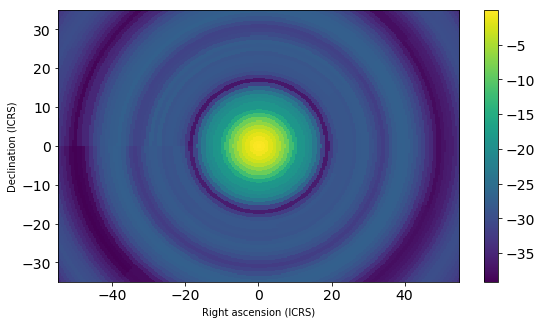

In [80]:
plt.figure(figsize=(9, 5))
im = plt.imshow(10*np.log10(image_grid_beam_mutual_26[0,:,:]),  extent=[-55, 55,-35, 35 ], cmap='viridis', aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

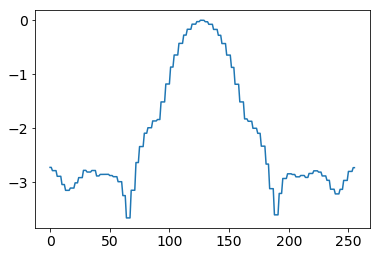

In [25]:
plt.plot(np.log10(image_grid_beam_mutual_26[0,:,128]))

## simulated sky models

In [28]:
path_to_rand='/vault-ike/ntsikelelo/simulated_ms_files/Artificial_sky_models/20_random_distributed_sources/'
RA_cen=np.zeros(shape=(200))
DE_cen=np.zeros(RA_cen.shape)
RA_cen[0:100]=np.load(path_to_rand+'RA_cen.npy')
DE_cen[0:100]=np.load(path_to_rand+'DE_cen.npy')
RA_cen[100:200]=np.load(path_to_rand+'RA_cen_outer.npy')
DE_cen[100:200]=np.load(path_to_rand+'DE_cen_outer.npy')
flux=np.ones(DE_cen.shape)*10
flux[100:200]=flux[100:200]*1e-4



In [39]:
image_grid_artificial=np.zeros(shape=(3,256,256))
field_off_set=np.array([0])
for k in range(len(flux)):
        index=lookupNearest_model(RA_cen[k],DE_cen[k],l,m)
        index=np.array(index)[:,0]
        image_grid_artificial[fi,index[0],index[1]]=image_grid_artificial[fi,index[0],index[1]]+flux[k]

In [30]:
def beam_interp_func(theta, phi, data):
            # convert to radians
            theta = copy.copy(theta) * np.pi / 180.0
            phi = copy.copy(phi) * np.pi / 180.0
            shape = theta.shape
            beam_interp = [healpy.get_interp_val(m, theta.ravel(), phi.ravel(), lonlat=False).reshape(shape) for m in data]
            return np.array(beam_interp)
        
# pointing direction
ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
radec0 = np.tile(radec0, (60,1)) 
fld.close() 
point_ra=np.rad2deg(radec0[0,0])
point_dec=np.rad2deg(radec0[0,1]) 

uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/NF_HERA_power_beam_healpix128.fits')
pol_ind = np.where(uvb.polarization_array ==-6)[0][0]
beam_maps = np.abs(uvb.data_array[0, 0, pol_ind, :, :])
beam_freqs = uvb.freq_array.squeeze() / 1e6
Nbeam_freqs = len(beam_freqs)
beam_nside = healpy.npix2nside(beam_maps.shape[1])
l,m=np.meshgrid(np.linspace(-60,60,256),np.linspace(-40,40,256))
theta = np.sqrt( (l)**2 + (m)**2 ) # center origin at the array dec and RA
phi = np.arctan2((m), (l)) + np.pi

pb = beam_interp_func(theta, phi,beam_maps)

Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows


In [33]:
beam_freqs[75]

175.0

divide by zero encountered in log10


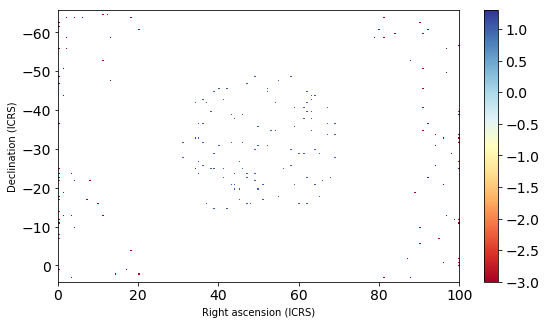

In [48]:
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(image_grid_artificial[0,:,:]), extent=[50-50, 50+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()

Text(0,0.5,'$\\phi [degrees]$')

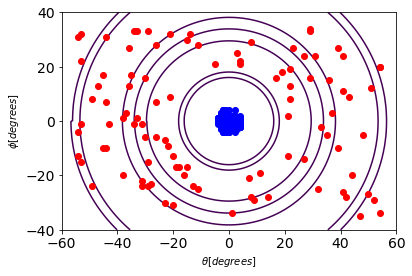

In [31]:


plt.plot(RA_cen[0:100],DE_cen[0:100],'ob')        
plt.plot(RA_cen[100:200],DE_cen[100:200],'or')
plt.contour(l,m,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.xlabel("$\\theta [degrees]$")
plt.ylabel("$\\phi [degrees]$")

## Beam plots 

## HERA beam

In [5]:


def beam_interp_func(theta, phi, data):
            # convert to radians
            theta = copy.copy(theta) * np.pi / 180.0
            phi = copy.copy(phi) * np.pi / 180.0
            shape = theta.shape
            beam_interp = [healpy.get_interp_val(m, theta.ravel(), phi.ravel(), lonlat=False).reshape(shape) for m in data]
            return np.array(beam_interp)
        
# pointing direction
ms = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split')
fld = table('/home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split'+'::FIELD')
radec0 = fld.getcol('PHASE_DIR').squeeze().reshape(1,2)
radec0 = np.tile(radec0, (60,1)) 
fld.close() 
point_ra=np.rad2deg(radec0[0,0])
point_dec=np.rad2deg(radec0[0,1]) 

uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/NF_HERA_power_beam_healpix128.fits')
pol_ind = np.where(uvb.polarization_array ==-6)[0][0]
beam_maps = np.abs(uvb.data_array[0, 0, pol_ind, :, :])
beam_freqs = uvb.freq_array.squeeze() / 1e6
Nbeam_freqs = len(beam_freqs)
beam_nside = healpy.npix2nside(beam_maps.shape[1])
l,m=np.meshgrid(np.linspace(-55,55,256),np.linspace(-35,35,256))
theta = np.sqrt( (l)**2 + (m)**2 ) # center origin at the array dec and RA
phi = np.arctan2((m), (l)) + np.pi

pb = beam_interp_func(theta, phi,beam_maps)


Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split: 25 columns, 82680 rows
Successful readonly open of default-locked table /home/ntsikelelo/zen.2458115.31193.xx.HH.uvR.ms.split::FIELD: 9 columns, 1 rows


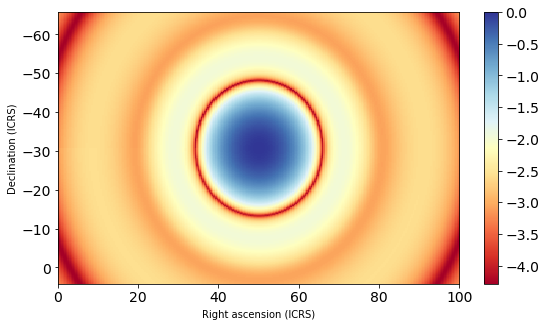

In [6]:
plt.figure(figsize=(9, 5))
im = plt.imshow(np.log10(pb[0,:,:]), extent=[50-50, 50+50, point_dec+35, point_dec-35], cmap=plt.cm.RdYlBu, aspect='auto')
# plt.contour(l+point_ra,m+point_dec,10*np.log10(pb[75,:,:]),levels=[-70,-30,-0.1])
plt.colorbar()
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()


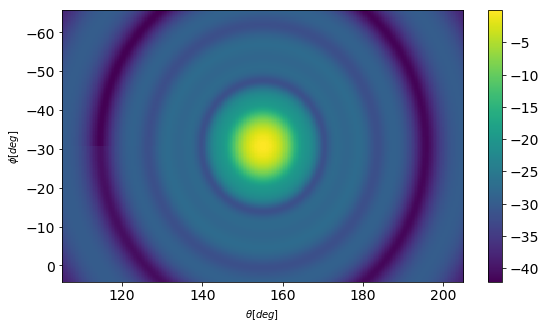

In [7]:
plt.figure(figsize=(9, 5))
im = plt.imshow(10*np.log10(pb[75,:,:]), extent=[155-50, 155+50, point_dec+35, point_dec-35], cmap='viridis', aspect='auto')
plt.xlabel('$\\theta [deg]$')
plt.ylabel('$\\phi [deg]$')
plt.colorbar(im)

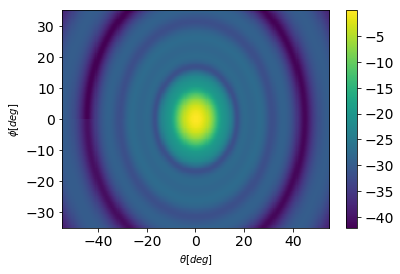

In [8]:

plt.imshow(10*np.log10(pb[75,:,:]), extent=[-55, 55,-35, 35 ], cmap='viridis', aspect='auto')
plt.xlabel('$\\theta [deg]$')
plt.ylabel('$\\phi [deg]$')
plt.colorbar(im)

## Mutual couple beam and HERA beam plots side cuts 

In [24]:
beam_name=np.array(['06','22','26'])
def beam_interp_func(theta, phi, data):
            # convert to radians
            theta = copy.copy(theta) * np.pi / 180.0
            phi = copy.copy(phi) * np.pi / 180.0
            shape = theta.shape
            beam_interp = [healpy.get_interp_val(m, theta.ravel(), phi.ravel(), lonlat=False).reshape(shape) for m in data]
            return np.array(beam_interp)
beam_side_mutual=np.zeros(shape=(3,256))
for k in range (len(beam_name)):
    uvb = UVBeam()
    uvb.read_beamfits('/home/ntsikelelo/HERA-Beams/NF_CrossCouplingBeams/NF_HERA-Dipole_ccbeam_port'+beam_name[k]+'_E-field.fits')
    uvb.peak_normalize()
    beam_xx =uvb.data_array[0, 0, 0, 250, :, :]
    beam_xx_cut = np.concatenate((np.flip(beam_xx[:, 0]), beam_xx[:, 180]))
#     beam_xy_cut = np.concatenate((np.flip(beam_xy[:, 0]), beam_xy[:, 180]))
    theta_plot = np.rad2deg(np.concatenate((-1*np.flip(uvb.axis2_array[:]), uvb.axis2_array)))
    x=np.linspace(-50,50,256)
    beam_side_mutual[k,:]=np.interp(x,theta_plot,np.abs(beam_xx_cut))
    

uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/NF_HERA_power_beam_healpix128.fits')
pol_ind = np.where(uvb.polarization_array ==-6)[0][0]
beam_maps = np.abs(uvb.data_array[0, 0, pol_ind, :, :])
beam_freqs = uvb.freq_array.squeeze() / 1e6
Nbeam_freqs = len(beam_freqs)
beam_nside = healpy.npix2nside(beam_maps.shape[1])
l=np.linspace(-50,50,256)
theta = np.sqrt( (l)**2 + (0)**2 ) # center origin at the array dec and RA
phi = np.arctan2((0), (l)) + np.pi
pb = beam_interp_func(theta, phi,beam_maps)
beam_cut=np.sqrt(pb[75,:])


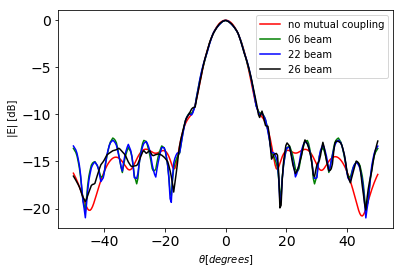

In [25]:
plt.figure()
plt.plot(l, 10*np.log10(beam_cut),'r', label='no mutual coupling')
plt.plot(l, 10*np.log10(beam_side_mutual[0,:]),'g', label='06 beam')
plt.plot(l, 10*np.log10(beam_side_mutual[1,:]),'b', label='22 beam')
plt.plot(l, 10*np.log10(beam_side_mutual[2,:]),'k', label='26 beam')
plt.xlabel('$\\theta [degrees]$')
plt.ylabel(" |E| [dB]")
plt.legend()



In [40]:
n_chan=1024
uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/NF_HERA_power_beam_healpix128.fits')
pol_ind = np.where(uvb.polarization_array ==-6)[0][0]
beam_maps = np.abs(uvb.data_array[0, 0, pol_ind, :, :])
beam_freqs = uvb.freq_array.squeeze() / 1e6
Nbeam_freqs = len(beam_freqs)
beam_nside = healpy.npix2nside(beam_maps.shape[1])

theta = np.sqrt( (1)**2 + (0)**2 ) # center origin at the array dec and RA
phi = np.arctan2((1), (0)) + np.pi

pb = beam_interp_func(theta, phi,beam_maps)

data_freqs=np.linspace(100,200,n_chan)
Ndata_freqs = len(data_freqs)

beam_values_hera=np.zeros(shape=(n_chan, 1))
pb_interp = interpolate.interp1d(beam_freqs,pb, kind='cubic')
beam_values_hera[:,0]=np.sqrt(pb_interp(data_freqs))
    

    
mutual_couple_beam_values=np.zeros((3,n_chan),dtype=complex)
for k in range (len(beam_name)):
    uvb = UVBeam()
    uvb.read_beamfits('/home/ntsikelelo/HERA-Beams/NF_CrossCouplingBeams/NF_HERA-Dipole_ccbeam_port'+beam_name[k]+'_E-field_phasecorrected.fits')
    uvb.peak_normalize()
    beam_maps = uvb.data_array[0, 0, 0, :, :, :]
    beam_freqs = uvb.freq_array.squeeze() / 1e6
    Nbeam_freqs = len(beam_freqs)
    phi_grid,theta_grid=np.meshgrid(uvb.axis1_array,uvb.axis2_array) 
   
    ##phase at zenith    
    theta_0 = np.sqrt( (0)**2 + (0)**2 ) # center origin at the array dec and RA
    phi_0 = np.arctan2((0), (0)) + np.pi
    index_0=lookupNearest(np.deg2rad(theta_0),np.deg2rad(phi_0),theta_grid,phi_grid)
    index_0=np.array(index_0)[:,0]
    pb_0=beam_maps[:,index_0[0],index_0[1]]
    
    theta = np.sqrt( (1)**2 + (0)**2 ) # center origin at the array dec and RA
    phi = np.arctan2((1), (0)) + np.pi
    index=lookupNearest(np.deg2rad(theta),np.deg2rad(phi),theta_grid,phi_grid)
    index=np.array(index)[:,0]
    pb=beam_maps[:,index[0],index[1]]
#     pb=pb*(np.conjugate(pb_0)/np.abs(pb_0))
    
    data_freqs=np.linspace(100,200,n_chan)
    Ndata_freqs = len(data_freqs)
    pb_interp_abs = interpolate.interp1d(beam_freqs,np.abs(pb), kind='cubic')
    pb_interp_phase = interpolate.interp1d(beam_freqs,pb, kind='cubic')
    phase=np.angle(pb_interp_phase(data_freqs))
    amp=pb_interp_abs(data_freqs)
    mutual_couple_beam_values[k,:]=amp*np.exp(1j*phase)    

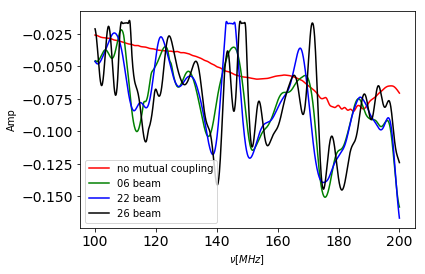

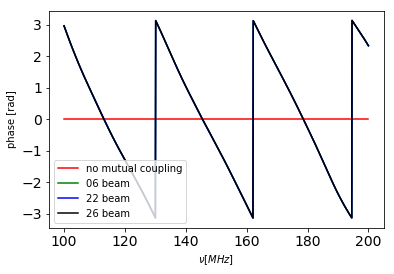

In [41]:
plt.plot(data_freqs,10*np.log10(np.abs(beam_values_hera)),'r',label='no mutual coupling')
plt.plot(data_freqs,10*np.log10(np.abs(mutual_couple_beam_values[0,:])),'g', label='06 beam')
plt.plot(data_freqs,10*np.log10(np.abs(mutual_couple_beam_values[1,:])),'b', label='22 beam')
plt.plot(data_freqs,10*np.log10(np.abs(mutual_couple_beam_values[2,:])),'k', label='26 beam')
plt.xlabel('$\\nu [MHz]$')
plt.ylabel('Amp')
plt.legend()
plt.figure()
plt.plot(data_freqs,np.angle(beam_values_hera),'r',label='no mutual coupling')
plt.plot(data_freqs,np.angle(mutual_couple_beam_values[0,:]),'g', label='06 beam')
plt.plot(data_freqs,np.angle(mutual_couple_beam_values[1,:]),'b', label='22 beam')
plt.plot(data_freqs,np.angle(mutual_couple_beam_values[2,:]),'k', label='26 beam')
plt.xlabel('$\\nu [MHz]$')
plt.ylabel('phase [rad]')
plt.legend()


## source moving through the beam (do not delete)

In [97]:
def lookupNearest(theta_s,phi_s,theta,phi):
  
  index = np.where((np.abs(theta-theta_s)==np.min(np.abs(theta-theta_s))) & 
                   (np.abs(phi-phi_s)==np.min(np.abs(phi-phi_s))))

  return index
uvb = UVBeam()
uvb.read_beamfits('/home/ntsikelelo/HERA-Beams/NF_CrossCouplingBeams/NF_HERA-Dipole_ccbeam_port06_E-field_phasecorrected.fits')
uvb.peak_normalize()
RA_cen=np.array(np.linspace(-100,100,200))
DE_cen=np.zeros(RA_cen.shape)
n_chan=1024

theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az mu 
phi = np.arctan2((DE_cen), (RA_cen)) + np.pi

beam_maps = uvb.data_array[0, 0, 0, :, :, :]
beam_freqs = uvb.freq_array.squeeze() / 1e6
Nbeam_freqs = len(beam_freqs)
phi_grid,theta_grid=np.meshgrid(uvb.axis1_array,uvb.axis2_array) ## theta,phi

theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # center origin at the array dec and RA
phi = np.arctan2((DE_cen), (RA_cen)) + np.pi

#phase at zenith    
theta_0 = np.sqrt( (0)**2 + (0)**2 ) # center origin at the array dec and RA
phi_0 = np.arctan2((0), (0)) + np.pi
index_0=lookupNearest(np.deg2rad(theta_0),np.deg2rad(phi_0),theta_grid,phi_grid)
index_0=np.array(index_0)[:,0]
pb_0=np.array(beam_maps[:,index_0[0],index_0[1]])



pb=np.zeros((beam_freqs.shape[0],DE_cen.shape[0]),dtype=complex)
for source in range (len(phi)):
    index=lookupNearest(np.deg2rad(theta[source]),np.deg2rad(phi[source]),theta_grid,phi_grid)
    index=np.array(index)[:,0]
    pb[:,source]=beam_maps[:,index[0],index[1]]*(np.conjugate(pb_0)/np.abs(pb_0))




                            



data_freqs=np.linspace(100,200,n_chan)
Ndata_freqs = len(data_freqs)
beam_values=np.zeros(shape=(n_chan, DE_cen.shape[0]),dtype=complex)

print("interpolating over freq")
for source in range (pb.shape[1]):
    pb_interp_abs = interpolate.interp1d(beam_freqs,np.abs(pb[:,source]), kind='cubic')
    pb_interp_phase = interpolate.interp1d(beam_freqs,pb[:,source], kind='cubic')
    phase=np.angle(pb_interp_phase(data_freqs))
    amp=pb_interp_abs(data_freqs)
    beam_values[:,source]=amp*np.exp(1j*phase)

interpolating over freq


<Figure size 432x288 with 0 Axes>

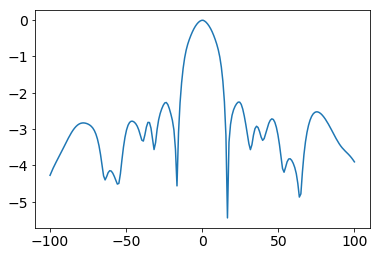

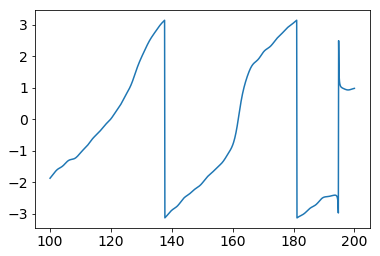

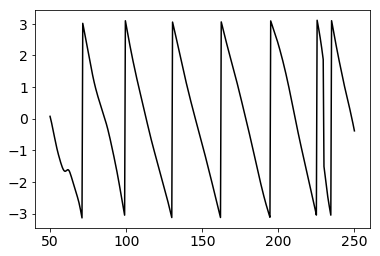

<Figure size 432x288 with 0 Axes>

In [100]:
plt.plot(RA_cen, np.log(np.abs(beam_values[0,:])))
plt.figure()
plt.plot(data_freqs,np.angle(beam_values[:,10]))
plt.figure()
plt.plot(beam_freqs,np.angle(pb_0),'k')
plt.figure()


### beam phase

In [12]:

def lookupNearest(theta_s,phi_s,theta,phi):
  
    index = np.where((np.abs(theta-theta_s)==np.min(np.abs(theta-theta_s))) & 
                   (np.abs(phi-phi_s)==np.min(np.abs(phi-phi_s))))
    return index

beam_name=np.array(['22'])
RA_cen_grid, DE_cen_grid=np.meshgrid(np.linspace(-50,50,256),np.linspace(-35,35,256))

RA_cen=RA_cen_grid.ravel()
DE_cen=DE_cen_grid.ravel()
for k in range (len(beam_name)):
   

    uvb = UVBeam()
    uvb.read_beamfits('/home/ntsikelelo/HERA-Beams/NF_CrossCouplingBeams/NF_HERA-Dipole_ccbeam_port'+beam_name[k]+'_E-field_phasecorrected.fits')
    uvb.peak_normalize()
    print("beam normalised")

    beam_maps = uvb.data_array[0, 0, 0, :, :, :]
    beam_freqs = uvb.freq_array.squeeze() / 1e6
    Nbeam_freqs = len(beam_freqs)
    phi_grid,theta_grid=np.meshgrid(uvb.axis1_array,uvb.axis2_array) ## phi,theta grid of beam

    theta = np.sqrt( (RA_cen)**2 + (DE_cen)**2 ) # source local az za 
    phi = np.arctan2((DE_cen), (RA_cen)) + np.pi

    #phase at zenith    
    theta_0 = np.sqrt( (0)**2 + (0)**2 ) # center origin at the array dec and RA
    phi_0 = np.arctan2((0), (0)) + np.pi
    index_0=lookupNearest(np.deg2rad(theta_0),np.deg2rad(phi_0),theta_grid,phi_grid)
    index_0=np.array(index_0)[:,0]
    pb_0=beam_maps[:,index_0[0],index_0[1]]

    pb=np.zeros((beam_freqs.shape[0],DE_cen.shape[0]),dtype=complex)
    for source in range (len(phi)):
        index=lookupNearest(np.deg2rad(theta[source]),np.deg2rad(phi[source]),theta_grid,phi_grid)
        index=np.array(index)[:,0]
        pb[:,source]=beam_maps[:,index[0],index[1]] 



beam normalised


In [19]:
index=np.where((np.abs(RA_cen)==np.abs(np.min(np.abs(RA_cen)))) & (np.abs(DE_cen)==np.abs(np.min(np.abs(DE_cen)))))

In [22]:
for freq in range(pb.shape[0]):    
    pb_center[freq]=pb[0,:][index]


In [7]:
image_beam=pb[0,:].reshape((256,256))

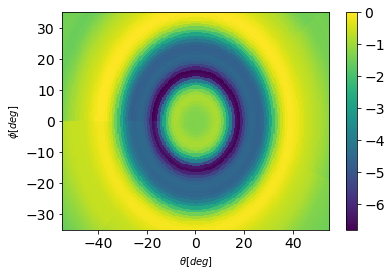

In [8]:
plt.imshow(10*np.log10(np.abs(image_beam)), extent=[-55, 55,-35, 35 ], cmap='viridis', aspect='auto')
plt.xlabel('$\\theta [deg]$')
plt.ylabel('$\\phi [deg]$')
plt.colorbar()

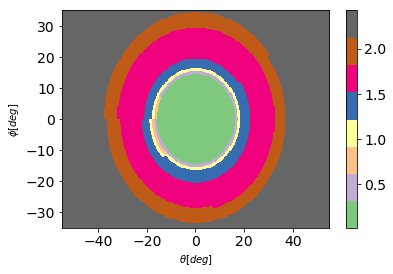

In [44]:
plt.imshow(np.angle(image_beam), extent=[-55, 55,-35, 35 ], cmap='Accent', aspect='auto')
plt.xlabel('$\\theta [deg]$')
plt.ylabel('$\\phi [deg]$')
plt.colorbar()

## HERA 19 antenna layout

In [45]:
def make_hex(N, D=15):
    x, y, ants = [], [], []
    ant = 0
    k = 0
    start = 0
    for i in range(2*N - 1):
        for j in range(N + k):
            x.append(j + start)
            y.append(i)
            ants.append(ant)
            ant += 1
        if i < N-1:
            k += 1
            start -= .5
        else:
            k -= 1
            start += .5
    x = np.array(x) - np.mean(x)
    y = np.array(y) - np.mean(y)
    return ants, np.vstack([x, y, np.zeros_like(x)]).T * D

In [46]:
ants19,xy=make_hex(N=3, D=14.6)

Text(0,0.5,'North position [m]')

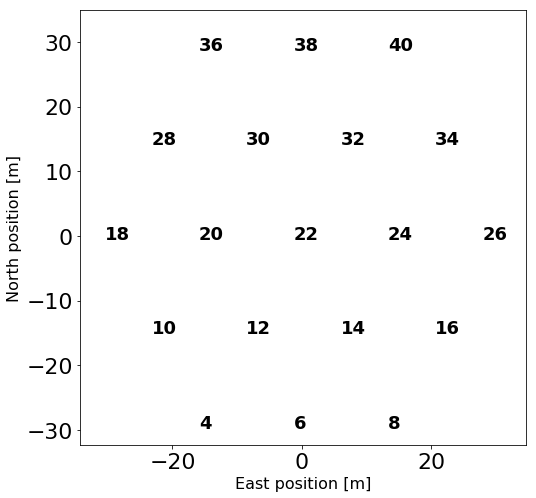

In [53]:
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22) 
label=np.array([4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40])
fig, ax = plt.subplots(figsize=(8, 8))
for i, a in enumerate(ants19):
    ax.scatter(xy[i,0], xy[i,1], marker='o', s=1200,c='w') 
    ax.text(xy[i,0]-1.3, xy[i,1]-0.5, label[a], fontsize=18,fontweight='bold')
ax.set_xlabel('East position [m]', fontsize=16); ax.set_ylabel('North position [m]', fontsize=16)   